# Trabalho Prático 3 - CCF 726
**Aluno**: Fábio Trindade Ramos - **Matrícula**: 3869
## Objetivo
O objetivo deste trabalho é aplicar os conhecimentos obtidos com tratamento de dados, engenharia 
de atributos, criação e ajustes de modelos de aprendizado de máquinas para resolver um problema 
real.

## Configuração inicial

In [1]:
import pathlib
import sys
import os
import warnings
requirements_filename = 'requirements_tp3.txt'
if str(pathlib.Path().resolve().name) == "notebooks":
    root = str(pathlib.Path().resolve().parent.parent)+os.sep
    sys.path.append(root)
    requirements_path = root + 'requirements/'+requirements_filename
else:
    ! git clone --branch ap8 https://github.com/Fabio-Trindade/Eng-Aprendizado-Maquina.git
    root = str(pathlib.Path().resolve())
    src_path = root + '/Eng-Aprendizado-Maquina/'
    requirements_path = src_path + 'requirements/'+requirements_filename
    sys.path.append(root + '/Eng-Aprendizado-Maquina/')
warnings.filterwarnings("ignore")

## Definindo raíz do projeto e caminho do dataset

In [2]:
from src.constants.KPaths import KPaths

root = KPaths.path_root
path_to_dataset = root + '/datasets/salarios-ciencia-dados.csv'

## Análise exploratória

### Leitura do dataset

In [3]:
import pandas as pd
df = pd.read_csv(path_to_dataset)
df

,#ano_trabalho,nivel_experiencia,tipo_emprego,titulo_trabalho,salario,moeda_salario,salario_em_dolar,residencia_empregado,percentual_remoto,local_empresa,tamanho_empresa
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


### Visão geral do dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   #ano_trabalho         3755 non-null   int64 
 1   nivel_experiencia     3755 non-null   object
 2   tipo_emprego          3755 non-null   object
 3   titulo_trabalho       3755 non-null   object
 4   salario               3755 non-null   int64 
 5   moeda_salario         3755 non-null   object
 6   salario_em_dolar      3755 non-null   int64 
 7   residencia_empregado  3755 non-null   object
 8   percentual_remoto     3755 non-null   int64 
 9   local_empresa         3755 non-null   object
 10  tamanho_empresa       3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


O *dataset* contém 3.755 observações com 11 atributos cada. Quatro destes atributos são números inteiros e 7 são strings. Além disso, nenhuma coluna contém dados nulos.

### Pré-processamento
A coluna salário é um atributo que não estará sempre presente em uma observação, portanto será retirada do dataset.

In [5]:
df = df.drop('salario',axis=1)

#### Verificando dados duplicados 

In [6]:
df.duplicated().sum()

1171

#### Removendo dados duplicados

In [7]:
df = df.drop_duplicates()

In [8]:
df

,#ano_trabalho,nivel_experiencia,tipo_emprego,titulo_trabalho,moeda_salario,salario_em_dolar,residencia_empregado,percentual_remoto,local_empresa,tamanho_empresa
0,2023,SE,FT,Principal Data Scientist,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,USD,100000,US,100,US,L


### Descrição estatística dos dados numéricos

In [9]:
numeric_columns = ['#ano_trabalho','salario_em_dolar','percentual_remoto']
df[numeric_columns].describe()

,#ano_trabalho,salario_em_dolar,percentual_remoto
count,2584.000000,2584.000000,2584.000000
mean,2022.301084,133409.280186,50.483746
std,0.749179,67136.837329,48.163707
min,2020.000000,5132.000000,0.000000
25%,2022.000000,84975.000000,0.000000
50%,2022.000000,130000.000000,50.000000
75%,2023.000000,175000.000000,100.000000
max,2023.000000,450000.000000,100.000000


Através das estatísticas acima percebe-se que:
* Os dados foram coletados durante 4 anos (2020-2023). Este atributo pode se tornar atributo categórico.
* As colunas salario_em_dolar e percentual_remoto contém um elevado desvio padrão.
* Os valores numéricos possuem diferentes escalas.
* Com exceção da coluna #ano_trabalho, em todas as colunas podem ser aplicadas técnicas de normalização.

### Histograma dos dados numéricos

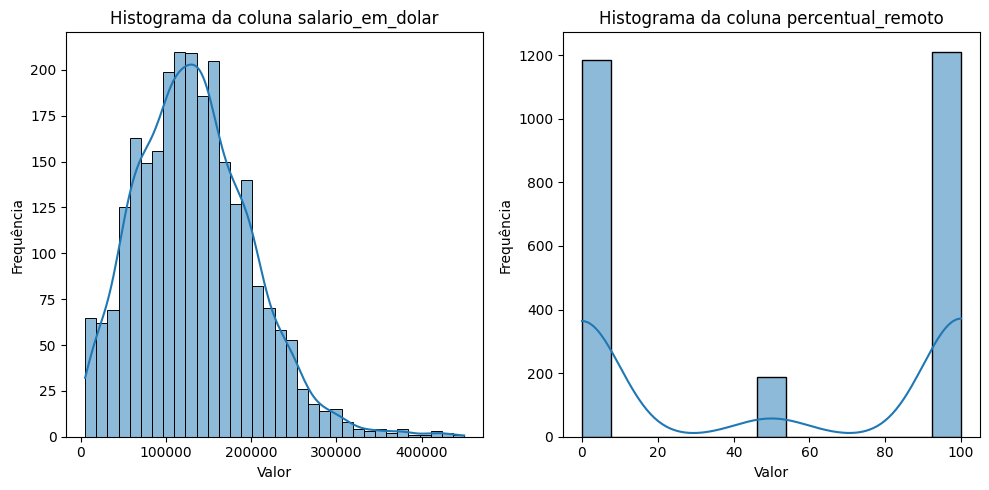

In [10]:
import seaborn as sns
from matplotlib import pyplot as plt

num_rows = 1
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 5))
axes = axes.flatten()

for i, col in enumerate( ['salario_em_dolar','percentual_remoto']):
    if col != '#ano_trabalho':
        sns.histplot(data=df, x=df[col], kde=True, multiple='stack', ax=axes[i])

        axes[i].set_title(f'Histograma da coluna {col}')
        axes[i].set_xlabel('Valor')
        axes[i].set_ylabel('Frequência')

plt.tight_layout()

plt.show()

A partir do histograma acima, percebe-se que a coluna percentual_remoto possivelmente contém 3 valores: 0, 50 e 100. Dessa forma, este atributo pode ser considerado como um atributo categórico. Já o histograma do atributo salario_em_dolar apresenta uma calda longa a direita, apresentando outliers.

### Análise par a par dos atributos numéricos

#### Correlação

<Axes: >

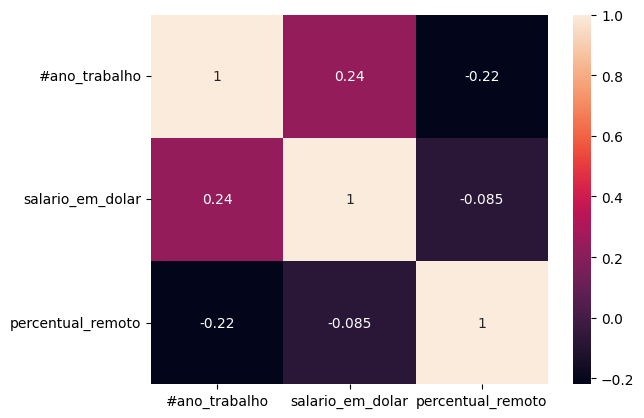

In [11]:
import seaborn as sns
sns.heatmap(data=df[numeric_columns].corr(), annot=True)

As colunas #ano_trabalho e percentual_remoto, e salario_em_dolar e #ano_remoto apresentam uma correlação fraca.

#### Gráficos de dispersão

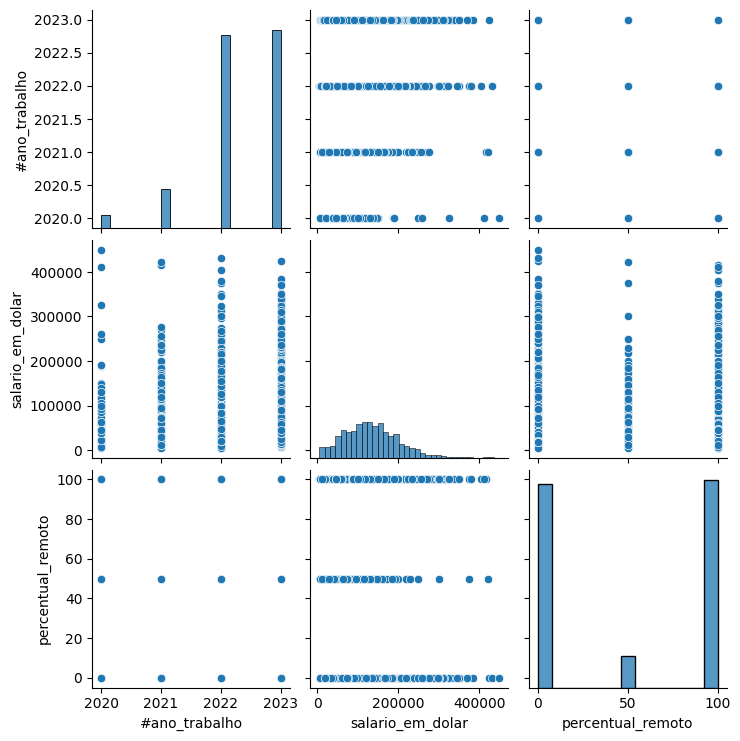

In [12]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.pairplot(df[numeric_columns])
plt.show()

Observações sobre os gráficos de dispersão:
* O gráfico salario_em_dolar x #ano_trabalho mostra que possivelmente quanto maior o ano, maior é a chance da pessoa ganhar um salário melhor.
* O gráfico percentual_remoto x salario_em_dolar mostra que pessoas que ganham 50% de percentual remoto tendem a não possuir elevados salários.

### Análise das colunas categóricas em relação a coluna salario_em_dolar

#### Função para gerar gráfico de histogramas agrupados por categoria junto com boxplots

In [13]:
def gen_graphics(categoric_column):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes = axes.flatten()
    sns.histplot(data=df, x=df['salario_em_dolar'], kde=True,hue=categoric_column, multiple='stack',ax=axes[0])
    df.boxplot('salario_em_dolar',by = categoric_column,ax=axes[1])
    plt.tight_layout()
    plt.show()


#### nivel_experiencia x salario_em_dolar

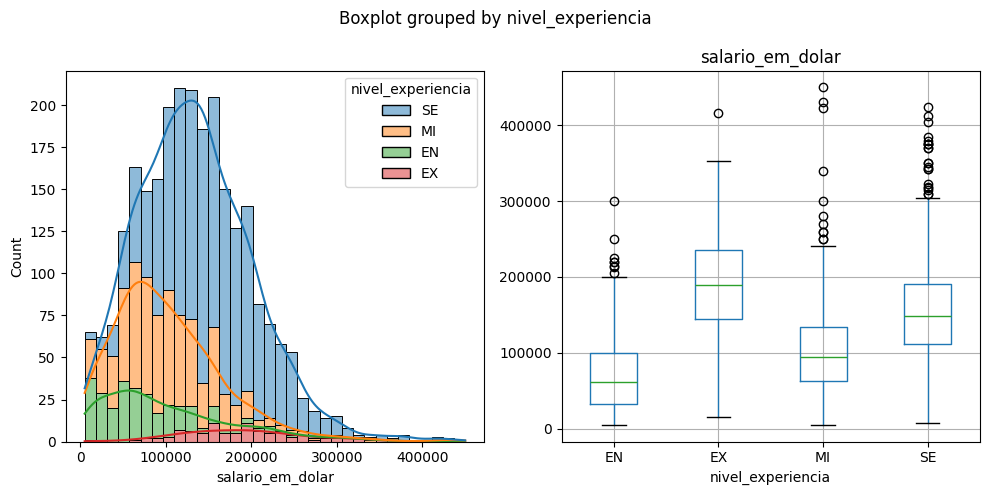

In [14]:
gen_graphics('nivel_experiencia')

Os gráficos acima mostram que quanto maior o cargo, mais comum é a existência de pessoas com maiores salários. 

#### tipo_emprego x salario_em_dolar

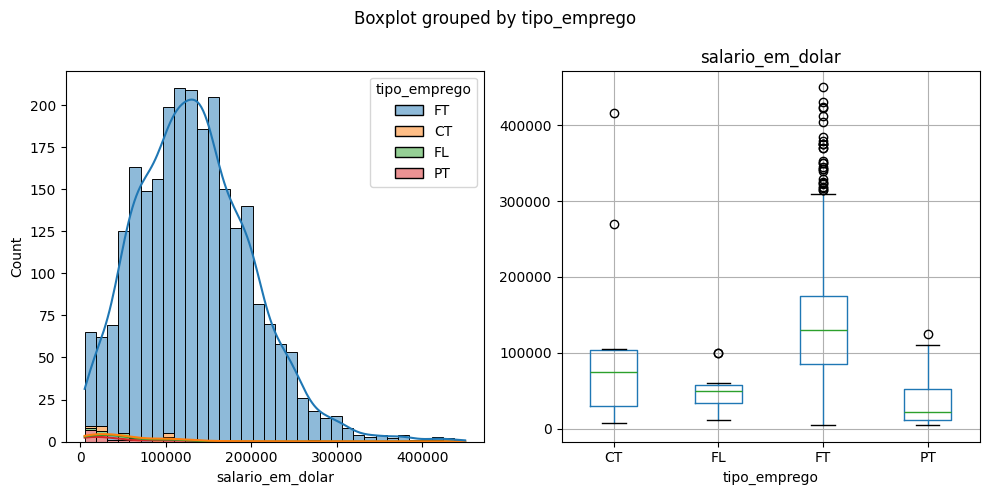

In [15]:
gen_graphics('tipo_emprego')

A maioria das pessoas trabalham em tempo integral e a maioria dos maiores salários são destas pessoas.

#### titulo_trabalho, moeda_salario,local_empresa,residencia_empregado x salario_em_dolar

##### Função para gerar o gráfico de barras por categoria e ordenar em ordem decrescente

In [16]:
def plot_large_classes_by_mean(column):
    mean_salary = df.groupby(column)['salario_em_dolar'].mean().reset_index()
    mean_salary = mean_salary.sort_values('salario_em_dolar', ascending=False)

    plt.figure(figsize=(14,21))
    sns.barplot(data=mean_salary, x='salario_em_dolar', y=column)
    plt.ylabel(None)
    plt.show()

##### titulo_trabalho x salario_em_dolar

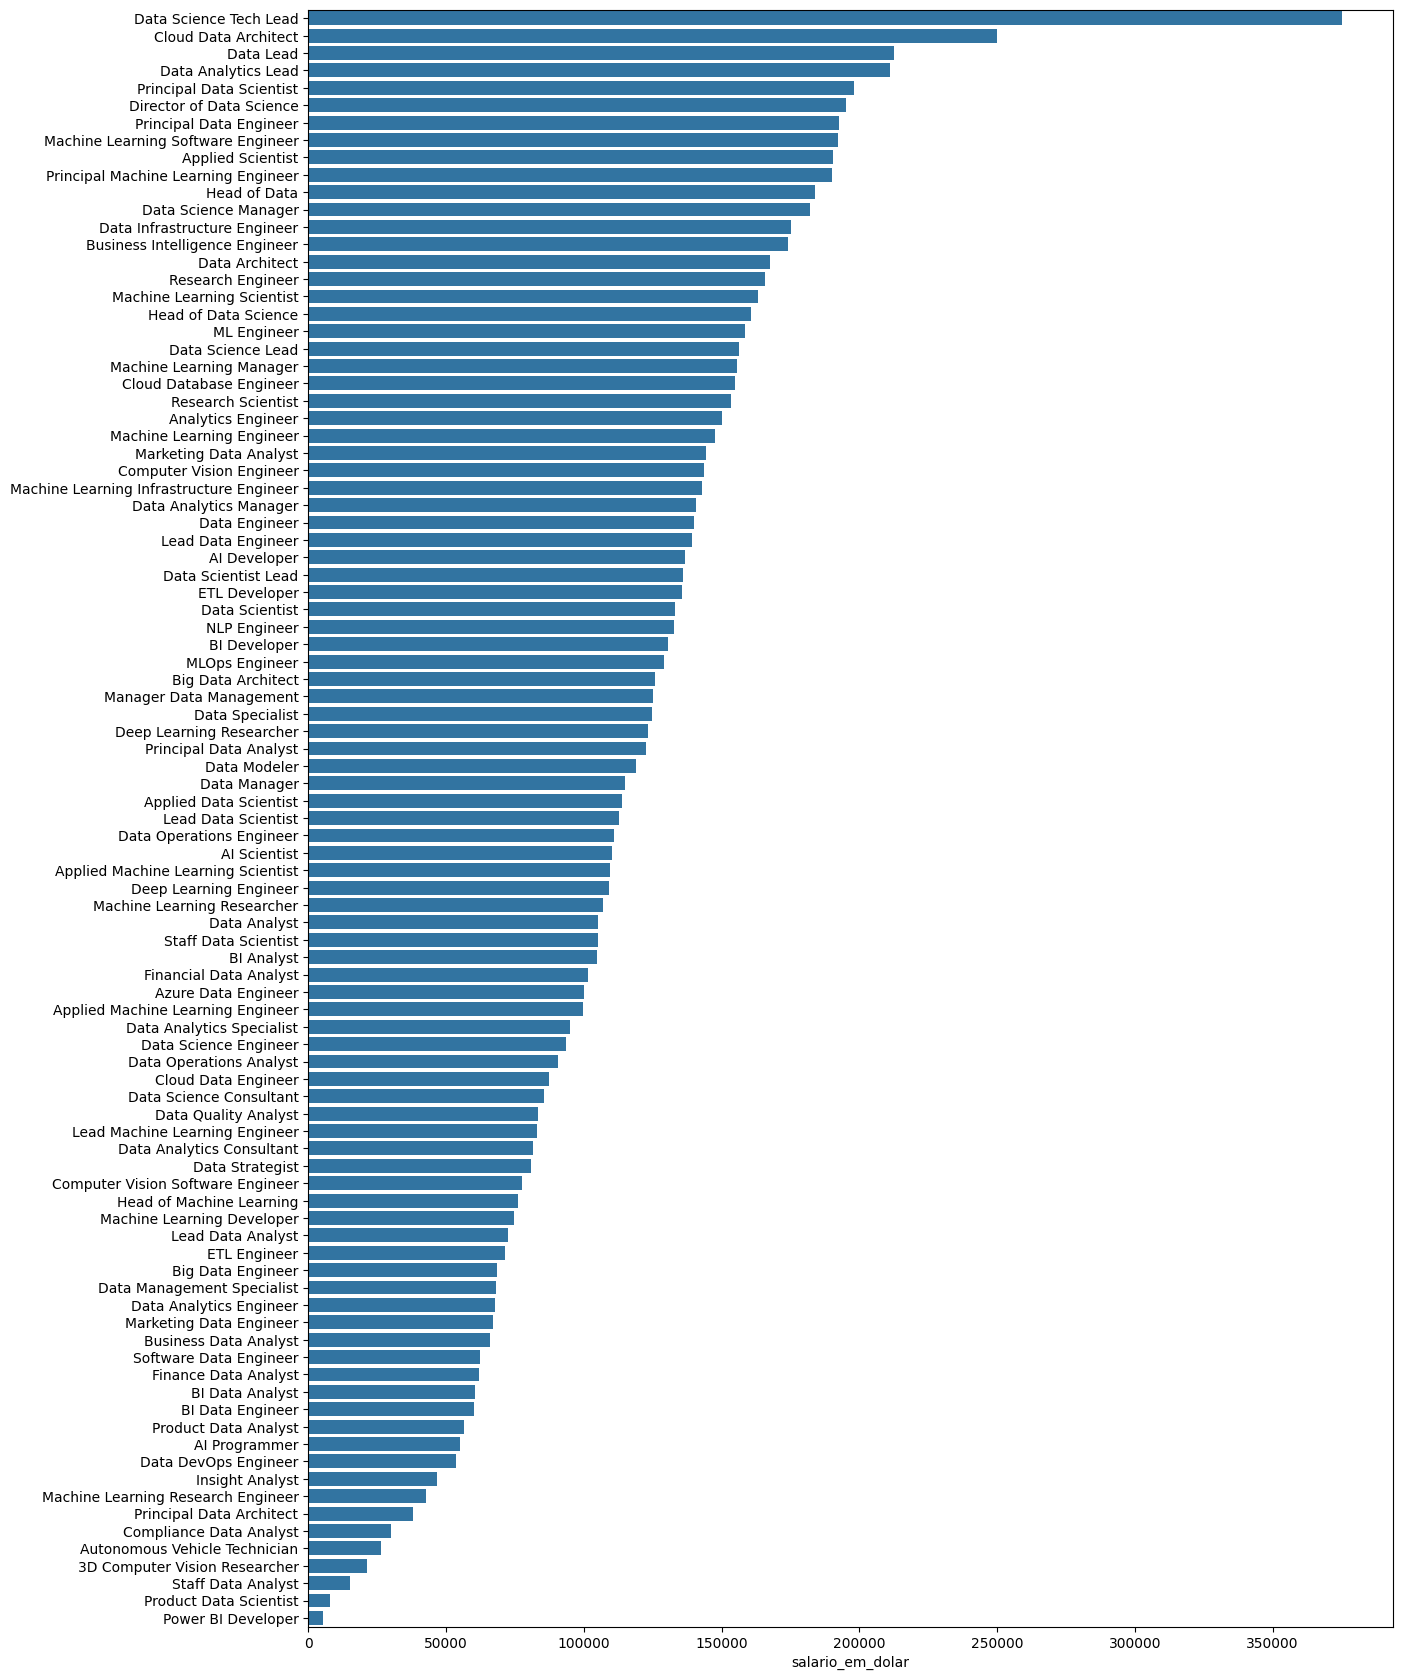

In [17]:
plot_large_classes_by_mean('titulo_trabalho')

##### moeda_salario x salario_em_dolar

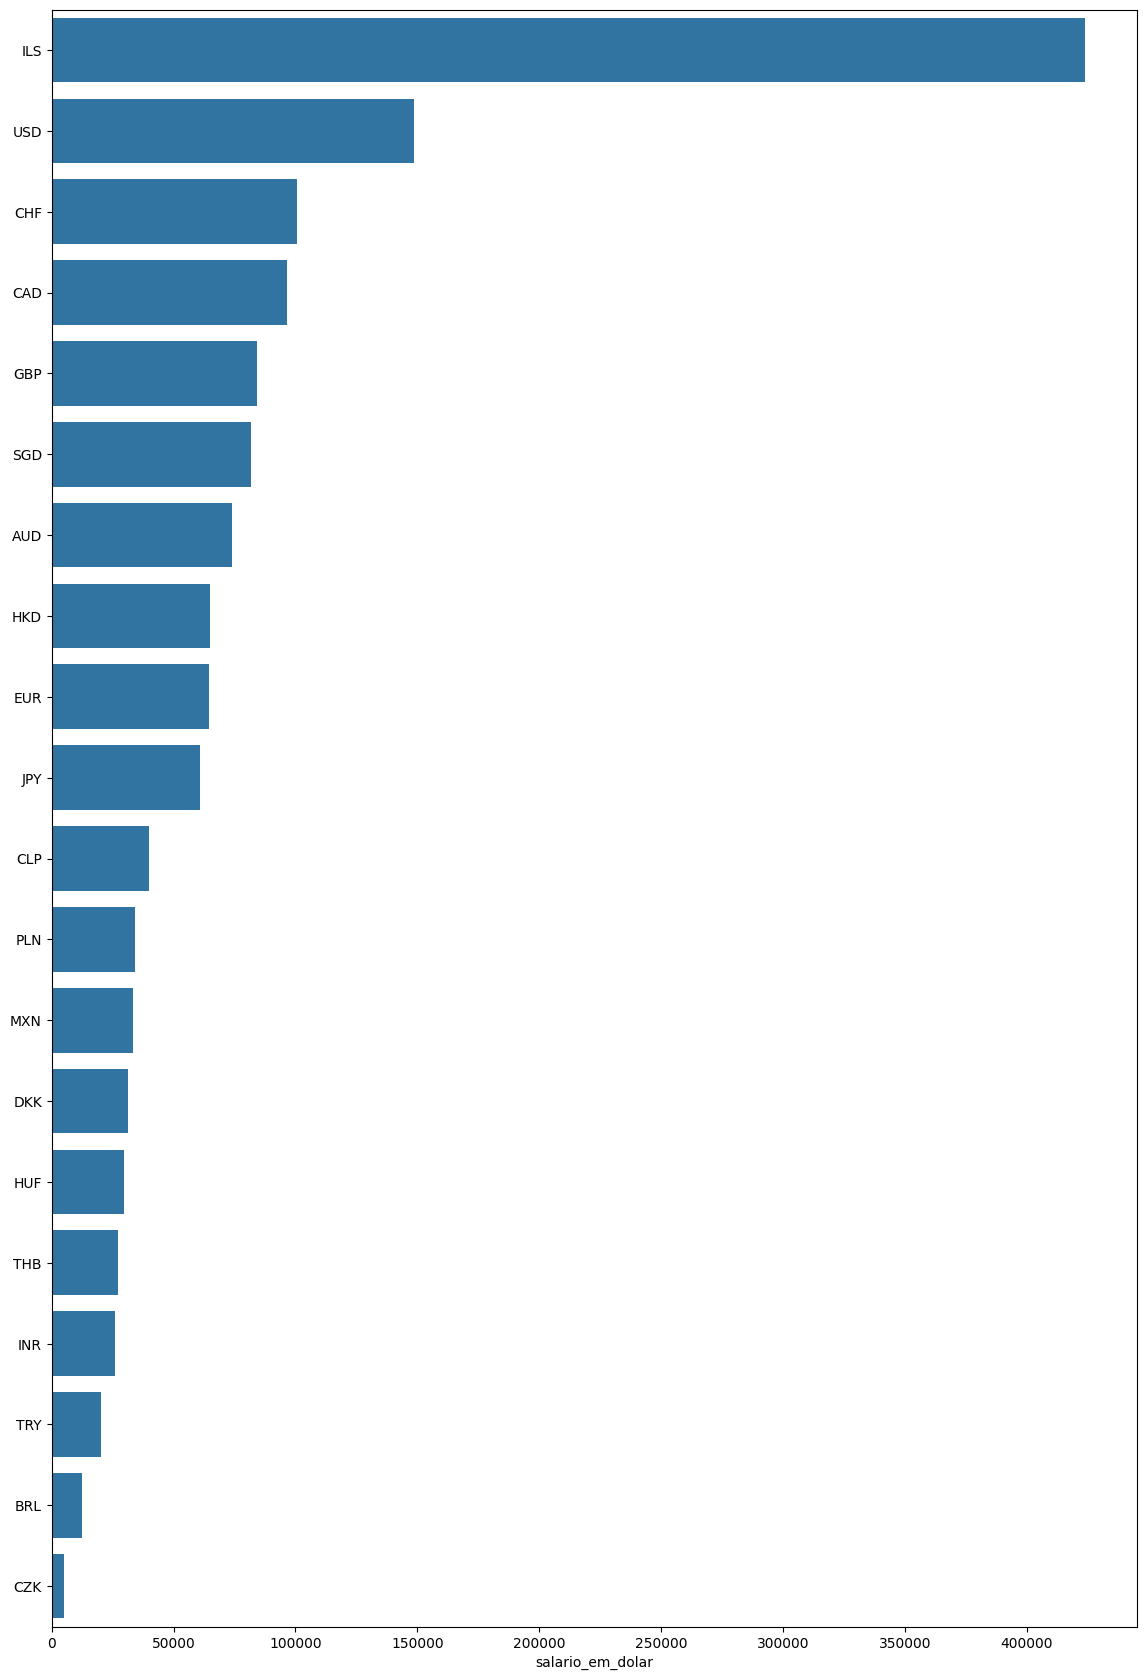

In [18]:
plot_large_classes_by_mean('moeda_salario')

##### local_empresa x salario_em_dolar

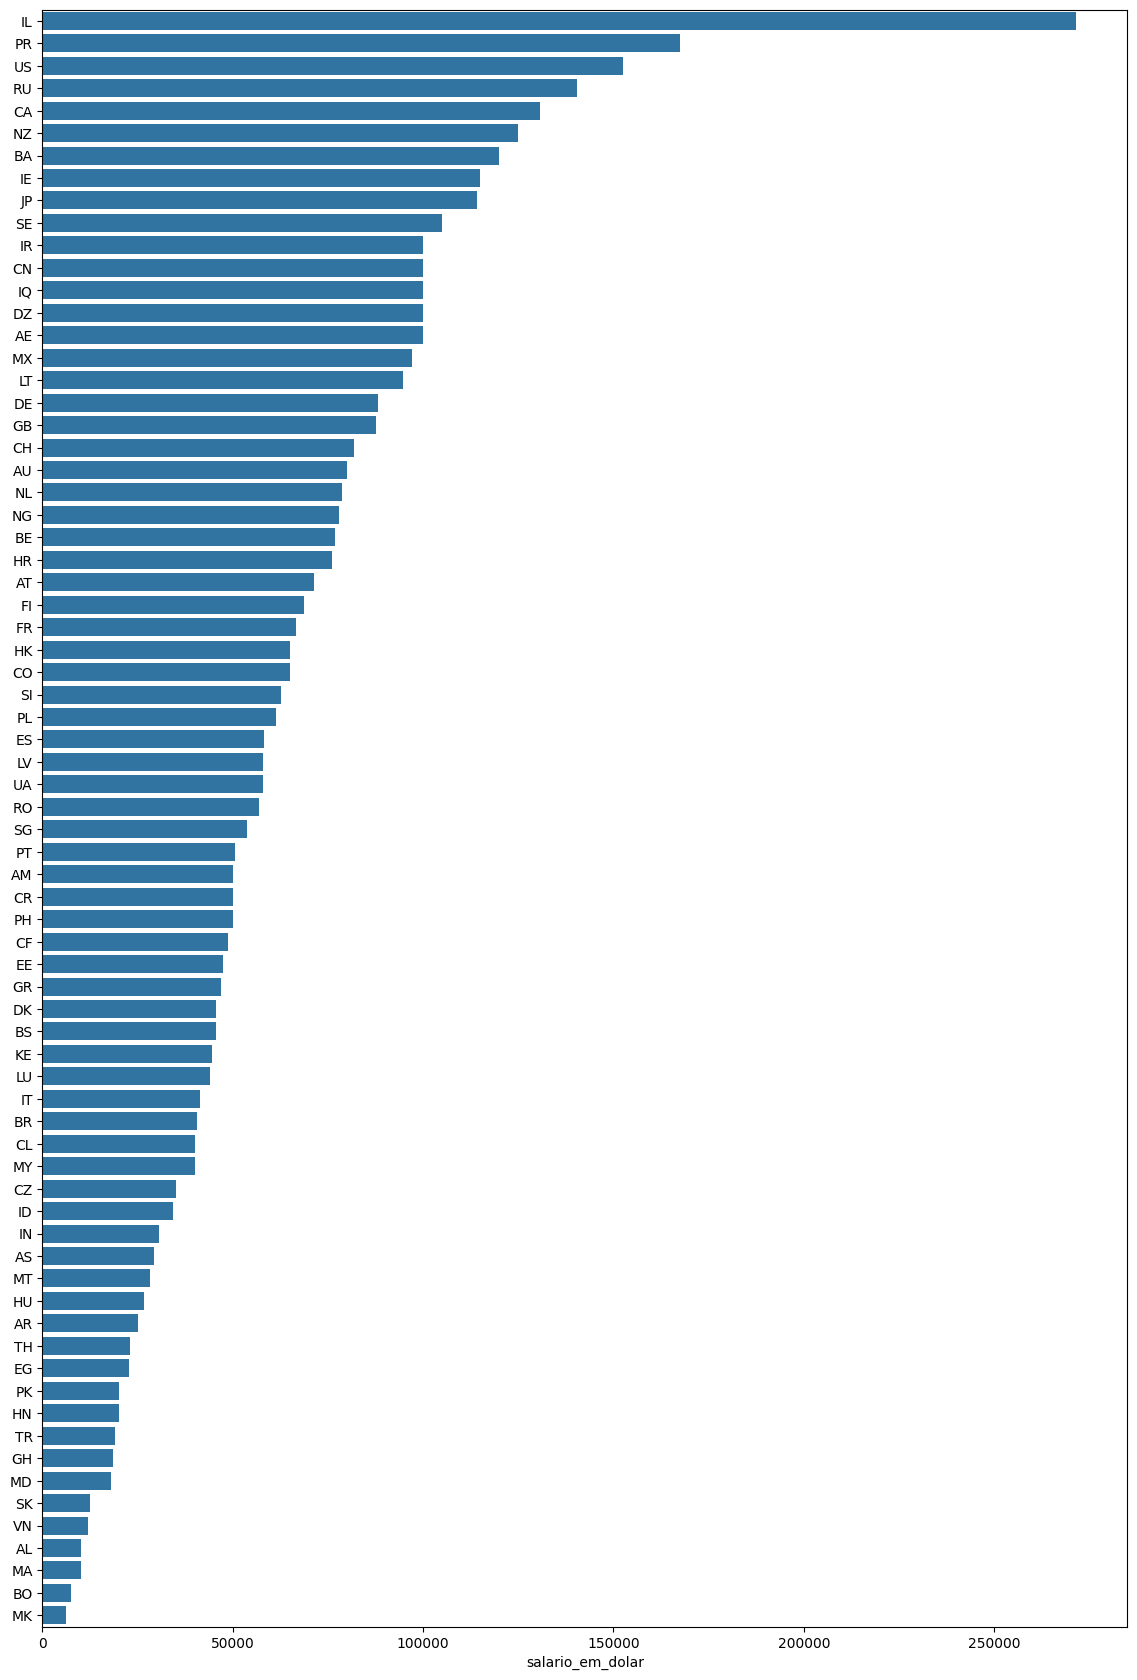

In [19]:
plot_large_classes_by_mean('local_empresa')

##### residencia_empregado x salario_em_dolar

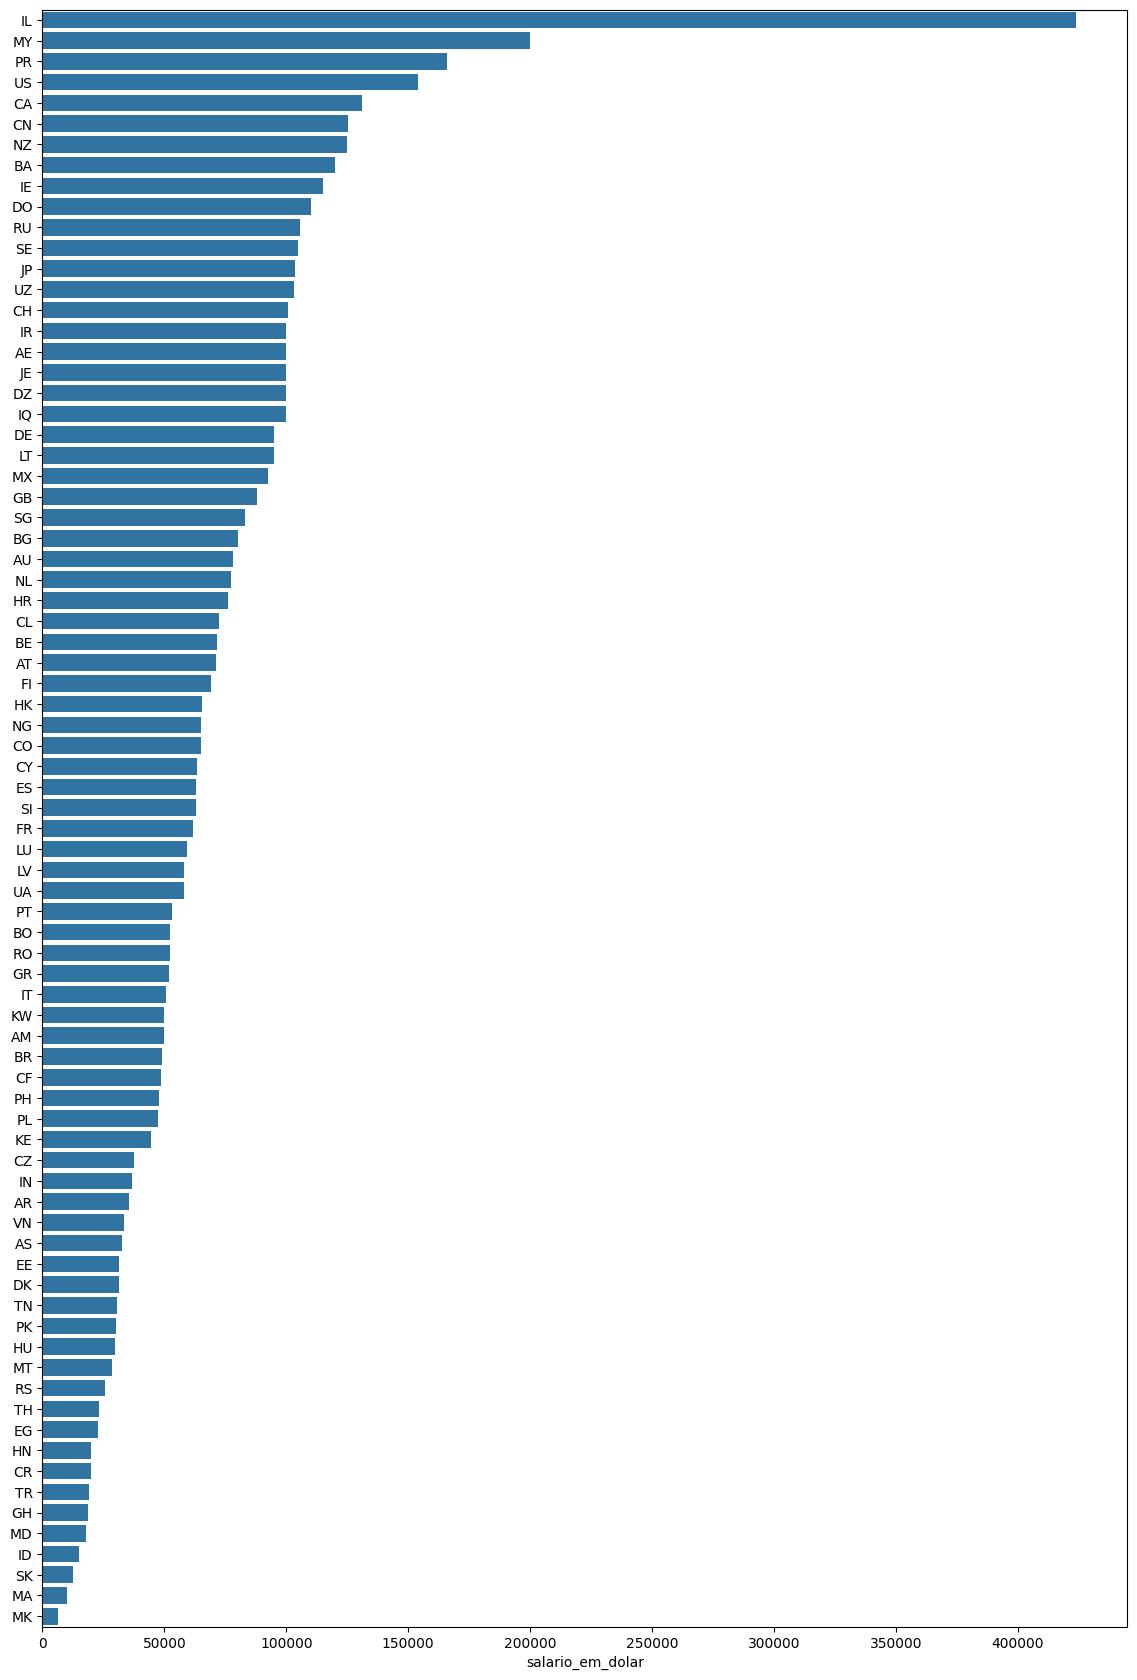

In [20]:
plot_large_classes_by_mean('residencia_empregado')

#### tamanho_empresa x salario_em_dolar

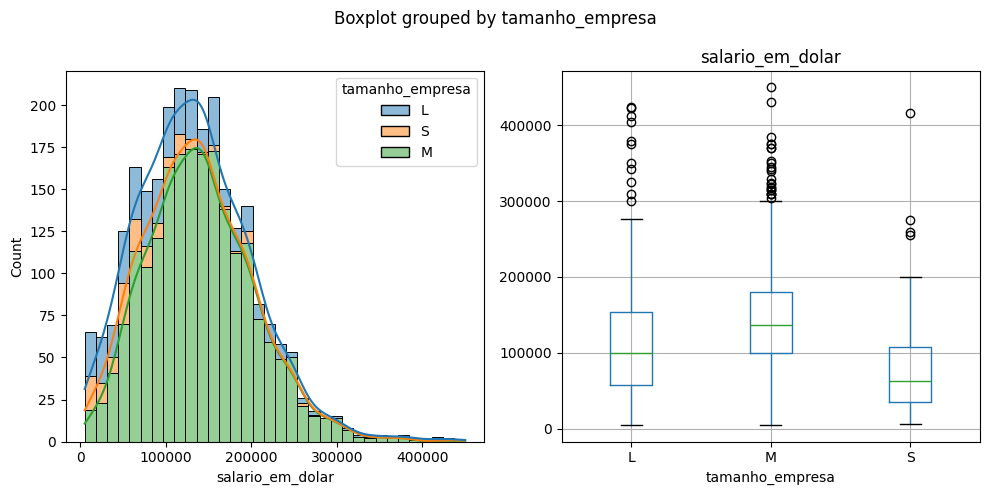

In [21]:
gen_graphics('tamanho_empresa')

Empresas pequenas normalmente não possuem pessoas que recebem salários maiores que 200.000 doláres.

#### Resumo e conclusão da análise exploratória

* O atributo #ano_trabalho e percentual_remoto serão considerados como atributos categóricos;
* O atributo salario foi removido do dataset;
* O atributo salario_em_dolar e #ano_trabalho possuem uma correlação fraca, ou seja, #ano_trabalho possivelmente influencia levemente o atributo salário_em_dolar;
* O atributo percentual_remoto e #ano_trabalho possuem uma correlação, mas como é uma correlação fraca, estes atributos não devem ser reduzidos a um único atributo;
* A partir da análise dos atributos categóricos em relação a coluna salario_em_dolar não foi possível perceber nenhum padrão entre as classes de cada atributo que pudessem se beneficiar de uma transformação, por ex., reduzir o número de classes de um atributo por apresentarem comportamentos similares em relação ao atributo alvo. Dessa forma, cada classe dos atributos categóricos serão transformadas para um valor numérico, e logo após, todos os atributos categóricos passarão por transformações one-hot encoding.
* Os gráficos apresentados na análise exploratória permitem retirar diversas informações acerca dos salários do usuários, por ex., pessoas com o cargo Lead tendem a ter um salário maior. Estas informações são relevantes para uma empresa e entendimento dos dados, mas devido a complexidade dos dados é difícil ter certeza se um modelo se beneficiará de transformações, por ex., transformar todas as classes que contém a palavra 'Lead' no atributo titulo_trabalho para um único atributo categórico indicando que a pessoa possui um cargo 'Lead'. Portanto as categorias originais de cada atributo serão mantidas para treinar o modelo.
* É possível derivar o atributo titulo_trabalho para indicar qual o tipo de trabalho ela possui. Para isso, a última palavra de cada observação deste atributo será utilizada. No entanto, primeiro serão realizados treinamentos com os dados originais e depois acrescentado este atributo para analisar se foi benéfico ou não o seu acréscimo.

## Engenharia de atributos

### Definindo váriaveis para *features* e *label*#

In [22]:
label = ['salario_em_dolar']
features = list(set(df.columns) - set(label))

### Cópia do dataset

In [23]:
df_cp = df.copy()

### Transformando atributos categóricos

#### Função para mapear valores categóricos em valores numéricos dado uma coluna

In [24]:
def map_categoric_values(df,column):
    unique_values = list(df[column].unique())
    for i,value in enumerate(unique_values):
        df[column][df[column] == value] = i
        

#### Mapeando categorias para valores numéricos

In [25]:
for column in features:
    map_categoric_values(df_cp,column)

In [26]:
display(df_cp)
display(df)

,#ano_trabalho,nivel_experiencia,tipo_emprego,titulo_trabalho,moeda_salario,salario_em_dolar,residencia_empregado,percentual_remoto,local_empresa,tamanho_empresa
0,0,0,0,0,0,85847,0,1,0,0
1,0,1,1,1,1,30000,1,1,1,1
2,0,1,1,1,1,25500,1,1,1,1
3,0,0,0,2,1,175000,2,1,2,2
4,0,0,0,2,1,120000,2,1,2,2
...,...,...,...,...,...,...,...,...,...,...
3750,2,0,0,2,1,412000,1,1,1,0
3751,3,1,0,0,1,151000,1,1,1,0
3752,2,2,0,2,1,105000,1,1,1,1
3753,2,2,1,20,1,100000,1,1,1,0


,#ano_trabalho,nivel_experiencia,tipo_emprego,titulo_trabalho,moeda_salario,salario_em_dolar,residencia_empregado,percentual_remoto,local_empresa,tamanho_empresa
0,2023,SE,FT,Principal Data Scientist,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,USD,100000,US,100,US,L


##### Função para transformar atributos categóricos numéricos em one-hot-encoding

In [27]:
def one_hot_encoding(df,columns):
    df_cp[columns] = df[columns].astype(str)
    dummies = pd.get_dummies(df_cp[columns])
    columns = dummies.columns
    df_dummies = pd.concat([dummies,df_cp[label]],axis=1)
    return df_dummies,columns

### Treinamento

#### TrainingHistory

Classe utilizada para salvar as métricas obtidas no dataset de validação durante o treinamento e plotar os gráficos de cada métrica ao longo das épocas ao final do treinamento. Este procedimento permite visualizar claramente o comportamento do modelo e identificar convergências ou overfitting.

In [28]:
class TrainingHistory:
    def __init__(self):
        self.mae_scores = []
        self.mse_scores = []
        self.r2_scores = []
        self.scores_list = [self.mae_scores,self.mse_scores,self.r2_scores]
        
    def add_scores(self, scores):
        for i,score in enumerate(scores):
            self.scores_list[i].append(score)

    def plot_scores(self):
        num_rows = 1
        num_cols = 3

        fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 5))
        axes = axes.flatten()

        for i, (score,label) in enumerate(zip(self.scores_list,['MAE','MSE','R2'])):
            axes[i].plot(score,label=label)
            axes[i].set_xlabel('Epoch')
            axes[i].set_ylabel(label)


        axes[1].set_title('Graphic of MAE, MSE and R2 metrics in validation dataset for each epoch')
        plt.tight_layout()
        plt.show()
        

#### Definindo funções auxiliares

##### Imports

In [29]:
import numpy as np
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split
import torch

##### Função para separar um conjunto de dados em dois outros conjuntos de dados

In [30]:
def split_data(df,test_size):
    df_train, df_test = train_test_split(df, test_size=test_size, random_state=42)
    df_train = df_train.reset_index().drop('index',axis=1)
    df_test = df_test.reset_index().drop('index',axis=1)
    return df_train,df_test

##### Função para calcular a métrica r2

In [31]:
def r2_score(y_true, y_pred):
    ss_res = torch.sum((y_true - y_pred) ** 2)
    ss_tot = torch.sum((y_true - torch.mean(y_true)) ** 2)
    r2 = 1 - ss_res / ss_tot
    return r2

##### Função para calcular e apresentar as métricas MAE, MSE e R2
Esta função permite analisar o comportamento de diferentes métricas, similar a função de report para classificação do sklearn.

In [32]:
def regression_report(y_true, y_pred):
    mae = mean_absolute_error(y_true,y_pred)
    mse = mean_squared_error(y_true,y_pred)
    r2 = r2_score(y_true,y_pred)
    print(f"MAE = {mae} - MSE = {mse} - R2 = {r2}")
    return mae,mse,r2

##### Funções de treinamento e avaliação
As funções abaixo realizam o treinamento (*train*) e avaliação (*eval*) de um modelo feito em PyTorch.

In [33]:
def train(model,optim,loss_fn,train_dataloader,val_dataset,epochs):
    training_history =  TrainingHistory()
    for epoch in range(epochs):
        model.train()
        for featuress,target in train_dataloader:
            optim.zero_grad()
            predictions = model(featuress)     
            loss = loss_fn(predictions, target)
            loss.backward()
            optim.step()
        metrics = eval(model,val_dataset)
        training_history.add_scores(metrics)
        print(f"Training metrics: epoch {epoch + 1} - loss {loss}")
    training_history.plot_scores()

def eval(model,test_dataset):
    model.eval()
    predictions = model(test_dataset[:][0])
    print('Metrics results:')
    return regression_report(test_dataset[:][1],predictions.detach().numpy())

#### Modelo Versão 1 (ModeloV1)
O modelo abaixo consiste de uma rede neural MLP, onde entre cada camada existe uma função de ativação LeakyReLU.

In [34]:
import torch
import torch.functional
import torch.nn as nn

class ModelV1(nn.Module):
    def __init__(self,dims) -> None:
        super(ModelV1,self).__init__()
        layers = []
        for i in range(len(dims) - 1):
            layers.append(nn.Linear(dims[i], dims[i+1])) 
            layers.append(nn.LeakyReLU(negative_slope=0.9))
        
        self.mlp = nn.Sequential(*layers)
    def forward(self,features):
        return self.mlp(features)

#### Criando datasets para o PyTorch
A classe abaixo é utilizada para preparar os dados diretamente para uso no PyTorch.

In [35]:
from torch.utils.data import Dataset
from src.transforms.to_torch_tensor import NumpyToTorchTensor
from torch.utils.data import DataLoader
#Tipo do dado
dtype = torch.float32
#Transformador
transform = NumpyToTorchTensor(dtype=dtype)
class SalarioDataset(Dataset):
    def __init__(self, df, features_columns,label_column,transform_feat = None,transform_label = None):
        self.x = df[features_columns].values
        self.y = df[label_column].values
        self.transform_feat = transform_feat
        self.transform_label = transform_label if transform_label else transform_feat
        self.len = len(self.x)

    def __getitem__(self,index):
        if self.transform_feat:
            return self.transform_feat(self.x[index]),self.transform_label(self.y[index])
        return self.x[index],self.y[index]

    def __len__(self):
        return self.len

#### Pipeline de treinamento
A função abaixo automatiza o processo de engenharia de atributos, treinamento e avaliação de um modelo PyTorch.

In [36]:
def pytorch_train_eval_pipeline(epochs,class_model,loss_fn,batch_size,df,feature_columns,label_column,**kargs):
    new_df = df.copy()

    transform_data_functions = kargs['transform_data_functions']
    transform_functions = kargs['transform_functions']
    hyperparameters = kargs['hyperparameters']
    
    for transform_function in transform_data_functions:
        new_df,feature_columns = transform_function(new_df,feature_columns)
    
    df_train, df_test = split_data(new_df, 0.15)
    df_train, df_val = split_data(df_train, 0.1)
    model = class_model(hyperparameters)

    optim = torch.optim.Adam(list(model.parameters()))

    train_dataset = SalarioDataset(df_train,feature_columns,label_column, *transform_functions)
    test_dataset = SalarioDataset(df_test,feature_columns,label_column, *transform_functions)
    val_dataset = SalarioDataset(df_val,feature_columns,label_column, *transform_functions)

    train_dataloader = DataLoader(train_dataset,batch_size, shuffle=True, num_workers=2)

    train(model,optim,loss_fn,train_dataloader,val_dataset,epochs)
    print('Evaluating model in test dataset...')
    eval(model,test_dataset)
    return model

#### Treinamento e avaliação do ModeloV1
O modelo versão 1 é treinado com transformações one-hot encoding nos dados e utilizando MAE como função de perda.

Metrics results:
MAE = 138639.0 - MSE = 23566350336.0 - R2 = -4.423064231872559
Training metrics: epoch 1 - loss 134206.8125
Metrics results:
MAE = 138638.890625 - MSE = 23566317568.0 - R2 = -4.423057556152344
Training metrics: epoch 2 - loss 130733.8359375
Metrics results:
MAE = 138638.75 - MSE = 23566278656.0 - R2 = -4.423048973083496
Training metrics: epoch 3 - loss 135735.359375
Metrics results:
MAE = 138638.578125 - MSE = 23566231552.0 - R2 = -4.423037052154541
Training metrics: epoch 4 - loss 134194.515625
Metrics results:
MAE = 138638.359375 - MSE = 23566172160.0 - R2 = -4.423024654388428
Training metrics: epoch 5 - loss 137271.640625
Metrics results:
MAE = 138638.09375 - MSE = 23566096384.0 - R2 = -4.423007011413574
Training metrics: epoch 6 - loss 132407.46875
Metrics results:
MAE = 138637.75 - MSE = 23565998080.0 - R2 = -4.422984600067139
Training metrics: epoch 7 - loss 133019.34375
Metrics results:
MAE = 138637.296875 - MSE = 23565871104.0 - R2 = -4.422955513000488
Training

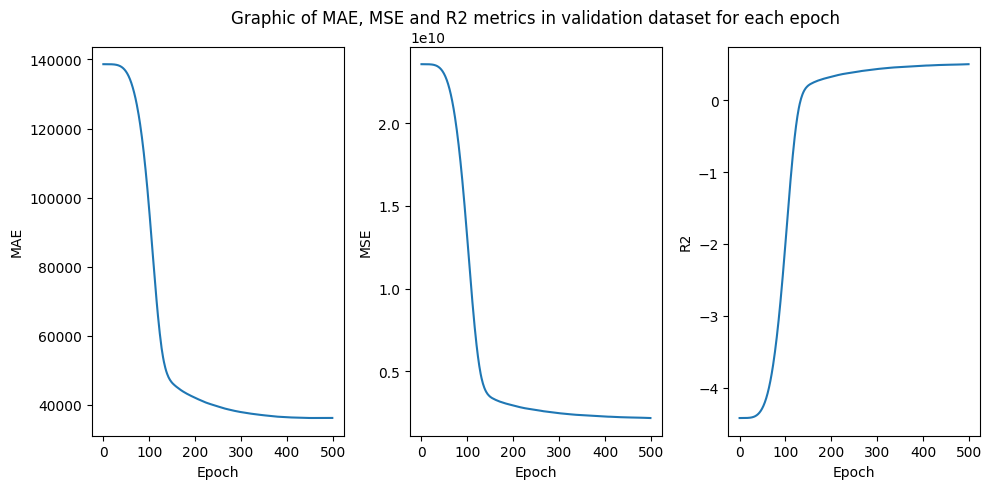

Evaluating model in test dataset...
Metrics results:
MAE = 36633.6953125 - MSE = 2479546880.0 - R2 = 0.43157637119293213


In [37]:
epochs = 500
loss_fn = nn.L1Loss()
model = pytorch_train_eval_pipeline(epochs,
                                    ModelV1,
                                    loss_fn,
                                    512,
                                    df_cp,
                                    features,
                                    label,
                                    transform_data_functions = [one_hot_encoding],
                                    hyperparameters = [280,20,30,15,1],
                                    transform_functions = [transform] )

A partir da métrica R2 percebe-se que o modelo não obteve bons resultados. Assim, novas transformações nos dados serão realizadas. Para isso, uma rede de token embedding será utilizada no modelo para aprender a transformar as categorias de cada atributo ao invés de utilizar one-hot encoding. 

### Novas transformações nos dados

##### Carregando features dos dados originais

In [38]:
features2 = list(set(df.columns) - set(label))

##### Função para transformar todos os valores categóricos em valores numéricos
Esta função mapeia as categorias de todo o dataset para um valor inteiro distinto.

In [39]:
from src.utils.util_pre_processor import UtilPreProcessor

def transform_categoric_values_to_token_values(df,features):
    df_cp2 = df.copy()
    df_cp2[features] = df_cp2[features].astype(str)
    words = UtilPreProcessor.get_unique_values_by_columns(df_cp2,features)
    vocab_to_index, _ = UtilPreProcessor.creat_vocab(words)
    for column in features:
        unique_values = list(df_cp2[column].unique())
        for value in unique_values:
            df_cp2[column][df_cp2[column] == value] = vocab_to_index[value]
    return df_cp2,features

#### Modelo versão 2
O modelo abaixo acrescenta uma rede de Embedding no modelo versão 1 para aprender a representar cada categoria.

In [40]:
import torch
import torch.functional
import torch.nn as nn

class ModelV2(nn.Module):
    def __init__(self,hyperparameters) -> None:
        super(ModelV2,self).__init__()
        layers = []
        len_vocab = hyperparameters[0]
        dim_embedd= hyperparameters[1]
        dims = hyperparameters[2:]
        self.embedding = nn.Embedding(len_vocab,dim_embedd)
        for i in range(len(dims) - 1):
            layers.append(nn.Linear(dims[i], dims[i+1],dtype=torch.float32)) 
            layers.append(nn.LeakyReLU(negative_slope=0.2))
        
        self.mlp = nn.Sequential(*layers)
    def forward(self,features):
        x = self.embedding(features)
        x = torch.nn.functional.leaky_relu(x.view(x.shape[0],-1),negative_slope=0.2)
        return self.mlp(x)

#### Definindo transformador para os valores categóricos passarem corretamente na rede de embedding

In [41]:
transform_int = NumpyToTorchTensor(dtype=torch.long)

##### Treinamento e avaliação do modelo versão 2

Metrics results:
MAE = 138632.5625 - MSE = 23564496896.0 - R2 = -4.422638893127441
Training metrics: epoch 1 - loss 131362.859375
Metrics results:
MAE = 138620.03125 - MSE = 23560888320.0 - R2 = -4.421808242797852
Training metrics: epoch 2 - loss 129412.90625
Metrics results:
MAE = 138598.953125 - MSE = 23554801664.0 - R2 = -4.420407772064209
Training metrics: epoch 3 - loss 133775.6875
Metrics results:
MAE = 138566.359375 - MSE = 23545411584.0 - R2 = -4.418246746063232
Training metrics: epoch 4 - loss 132882.125
Metrics results:
MAE = 138518.90625 - MSE = 23531737088.0 - R2 = -4.41510009765625
Training metrics: epoch 5 - loss 133078.296875
Metrics results:
MAE = 138452.453125 - MSE = 23512606720.0 - R2 = -4.4106974601745605
Training metrics: epoch 6 - loss 133283.59375
Metrics results:
MAE = 138362.15625 - MSE = 23486633984.0 - R2 = -4.404719829559326
Training metrics: epoch 7 - loss 134747.3125
Metrics results:
MAE = 138242.421875 - MSE = 23452213248.0 - R2 = -4.3968000411987305
Trai

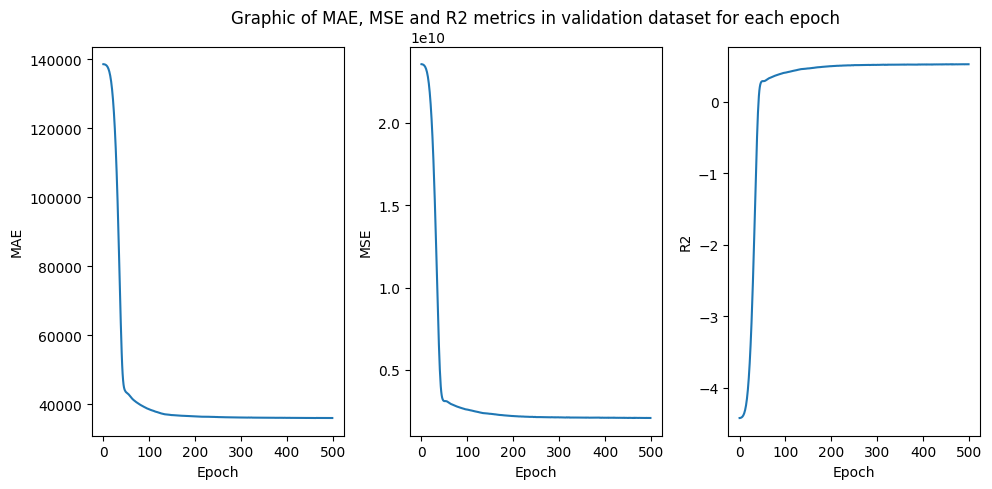

Evaluating model in test dataset...
Metrics results:
MAE = 36160.09375 - MSE = 2455460864.0 - R2 = 0.4370979070663452


In [42]:
dim_embed_vocab = 256
first_dim_mlp = dim_embed_vocab*9
model = pytorch_train_eval_pipeline(epochs,ModelV2,loss_fn,512,df,features2,label,
                                    transform_data_functions = [transform_categoric_values_to_token_values],
                                    hyperparameters = [209,dim_embed_vocab,first_dim_mlp,128,64,1],
                                    transform_functions = [transform_int,transform] )

Mesmo acrescentando uma rede de embedding no modelo não foi possível obter uma melhoria relevante nos resultados. Na próxima seção serão utilizados outros algoritmos diferentes para analisar possíveis melhorias.

### Avaliando resultados dos algoritmos SVM e LR
Para estes algoritmos, a transformação one-hot encoding será utilizada.

#### Definindo dataframe a ser utlizado para treinamento

In [43]:
df_cp3 = df.copy()
df_cp3[['#ano_trabalho','percentual_remoto']] = df_cp3[['#ano_trabalho','percentual_remoto']].astype(str)


#### Transformando dados em one-hot encoding

In [44]:
df_cp3,features3 = one_hot_encoding(df_cp3,features2)

#### Função para treinar e avaliar um modelo do sklearn

In [45]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score
from sklearn.linear_model import LinearRegression

def train_eval_sklearn_model_with_cv_and_grid_search(model,param_grid,df,feature_columns,label_column):
    df_train, df_test = split_data(df, 0.20)
   
    scoring = make_scorer(r2_score)

    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=10)

    grid_search.fit(df_train[feature_columns], df_train[label_column])
    y_pred = grid_search.predict(df_test[feature_columns])

    regression_report(df_test[label_column],y_pred)

    print("Melhores parâmetros encontrados:", grid_search.best_params_)
    print("Melhor pontuação (R² Score):", grid_search.best_score_)


#### Treinamento e avaliação do SVM

In [46]:
param_grid = {
        'C': [0.1,100,100000],
        'epsilon': [0.1, 0.01, 0.001],
        'kernel': ['poly','rbf','linear','sigmoid']
    }
train_eval_sklearn_model_with_cv_and_grid_search(svm.SVR(),param_grid,df_cp3,features3,label)

MAE = 37643.80871347976 - MSE = 2595270634.877288 - R2 = 0.406669413399227
Melhores parâmetros encontrados: {'C': 100000, 'epsilon': 0.1, 'kernel': 'rbf'}
Melhor pontuação (R² Score): 0.44425415174635513


O modelo treinado pelo SVM apresentou um pior resultado do que os modelos anteriores no dataset de teste (R2 = 40.6%). Percebe-se nos resultados acima que o valor para o hiper-parâmetro C foi muito alto, indicando a necessidade de um fator de regularização, como visto também na análise exploratória a presença de outliers. 

Assim, outliers serão retirados do dataset para analisar novamente os resultados dos modelos.

#### Treinamento e avaliação da Regressão Linear

In [47]:
param_grid = {
       'fit_intercept':[True,False]
    }

train_eval_sklearn_model_with_cv_and_grid_search(LinearRegression(),param_grid,df_cp3,features3,label)

MAE = 512568079314962.0 - MSE = 1.4716064423095302e+31 - R2 = -3.364385594037576e+21
Melhores parâmetros encontrados: {'fit_intercept': False}
Melhor pontuação (R² Score): -8.403608609671867e+23


O modelo treinado pela regressão linear foi incapaz de se ajustar aos dados.

### Derivando o atributo titulo_trabalho
Como os modelos continuam apresentando resultados ruins, será derivado um novo atributo do atributo titulo_trabalho, o qual será obtido extraindo o tipo de trabalho que a pessoa possui. Por ex., se a pessoa possui o trabalho ML Engineer o atributo derivado será Engineer.

#### Obtendo novo atributo

In [48]:
df_cp4 = df.copy()
df_cp4['derivate_att'] = df['titulo_trabalho'].map(lambda x: x.split()[-1])

In [49]:
df_cp4.head()

,#ano_trabalho,nivel_experiencia,tipo_emprego,titulo_trabalho,moeda_salario,salario_em_dolar,residencia_empregado,percentual_remoto,local_empresa,tamanho_empresa,derivate_att
0,2023,SE,FT,Principal Data Scientist,EUR,85847,ES,100,ES,L,Scientist
1,2023,MI,CT,ML Engineer,USD,30000,US,100,US,S,Engineer
2,2023,MI,CT,ML Engineer,USD,25500,US,100,US,S,Engineer
3,2023,SE,FT,Data Scientist,USD,175000,CA,100,CA,M,Scientist
4,2023,SE,FT,Data Scientist,USD,120000,CA,100,CA,M,Scientist


#### Treinamento e avaliação com o melhor modelo do PyTorch

Metrics results:
MAE = 138631.921875 - MSE = 23564328960.0 - R2 = -4.4226005863376585
Training metrics: epoch 1 - loss 141639.125
Metrics results:
MAE = 138618.109375 - MSE = 23560364032.0 - R2 = -4.4216879594065785
Training metrics: epoch 2 - loss 135040.203125
Metrics results:
MAE = 138594.890625 - MSE = 23553712128.0 - R2 = -4.42015675456377
Training metrics: epoch 3 - loss 127124.21875
Metrics results:
MAE = 138558.8125 - MSE = 23543371776.0 - R2 = -4.417777227424675
Training metrics: epoch 4 - loss 134218.296875
Metrics results:
MAE = 138506.09375 - MSE = 23528271872.0 - R2 = -4.414303719589988
Training metrics: epoch 5 - loss 129949.8828125
Metrics results:
MAE = 138432.265625 - MSE = 23507146752.0 - R2 = -4.409441027472565
Training metrics: epoch 6 - loss 135696.328125
Metrics results:
MAE = 138332.0625 - MSE = 23478480896.0 - R2 = -4.4028451052524495
Training metrics: epoch 7 - loss 127277.546875
Metrics results:
MAE = 138199.375 - MSE = 23440586752.0 - R2 = -4.394124986119659


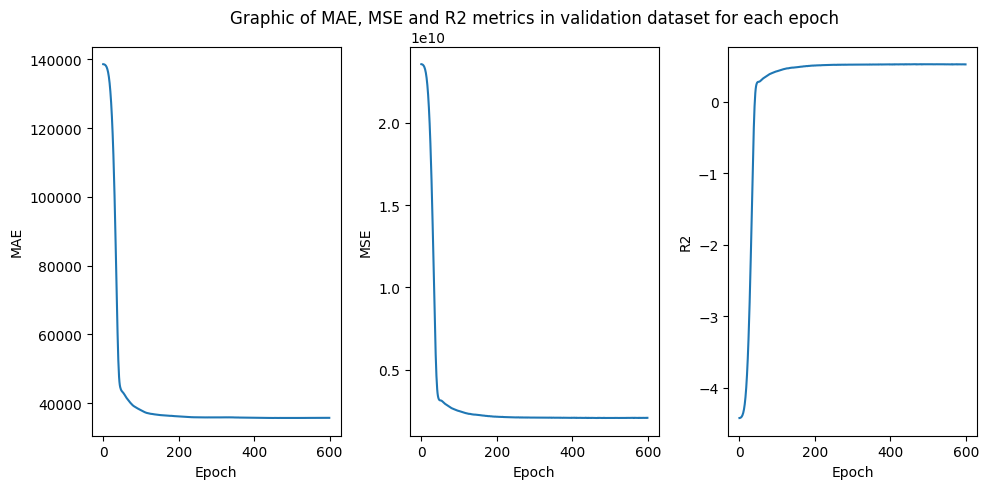

Evaluating model in test dataset...
Metrics results:
MAE = 35964.73046875 - MSE = 2450199552.0 - R2 = 0.4383040826881286


In [50]:
first_dim_mlp = dim_embed_vocab*10
features4 = list(set(df_cp4.columns) - set(label))
model = pytorch_train_eval_pipeline(600,ModelV2,loss_fn,512,df_cp4,features4,label,
                                    transform_data_functions = [transform_categoric_values_to_token_values],
                                    hyperparameters = [227,dim_embed_vocab,first_dim_mlp,128,64,1],
                                    transform_functions = [transform_int,transform] )

O modelo obteve um resultado levemente melhor com o acréscimo deste atributo

#### Treinamento com SVM

In [51]:
df_cp4 = df.copy()
df_cp4['derivate_att'] = df['titulo_trabalho'].map(lambda x: x.split()[-1])

In [52]:
df_cp4,features4 = one_hot_encoding(df_cp4,features4)

In [53]:
param_grid = {
        'C': [100000],
        'epsilon': [1,0.1,0.5],
        'kernel': ['poly','rbf','linear','sigmoid']
    }
train_eval_sklearn_model_with_cv_and_grid_search(svm.SVR(),param_grid,df_cp4,features4,label)

MAE = 37420.23909278924 - MSE = 2578409485.63141 - R2 = 0.41052420813175894
Melhores parâmetros encontrados: {'C': 100000, 'epsilon': 1, 'kernel': 'rbf'}
Melhor pontuação (R² Score): 0.4489085049240929


### Analisando a importância das features
Para analisar as features importantes para o modelo, serão realizados vários treinamentos iterativos, onde cada treinamento contará com o acréscimo de uma feature. Como a diferença entre os resultados dos modelos não foi relevante e a função de treinamento do PyTorch apresenta gráficos, para fins de simplicidade o modelo versão 1 será utilizado para este propósito.

Adding feature moeda_salario
Metrics results:
MAE = 138638.796875 - MSE = 23566297088.0 - R2 = -4.423052832054126
Training metrics: epoch 1 - loss 126669.828125
Metrics results:
MAE = 138638.75 - MSE = 23566278656.0 - R2 = -4.4230486032510274
Training metrics: epoch 2 - loss 129062.828125
Metrics results:
MAE = 138638.671875 - MSE = 23566254080.0 - R2 = -4.423043549741108
Training metrics: epoch 3 - loss 127565.7578125
Metrics results:
MAE = 138638.578125 - MSE = 23566231552.0 - R2 = -4.423037869062718
Training metrics: epoch 4 - loss 132517.9375
Metrics results:
MAE = 138638.453125 - MSE = 23566202880.0 - R2 = -4.423031876520755
Training metrics: epoch 5 - loss 139385.4375
Metrics results:
MAE = 138638.375 - MSE = 23566174208.0 - R2 = -4.4230249657997165
Training metrics: epoch 6 - loss 135112.296875
Metrics results:
MAE = 138638.25 - MSE = 23566139392.0 - R2 = -4.423017044019383
Training metrics: epoch 7 - loss 134046.46875
Metrics results:
MAE = 138638.09375 - MSE = 23566102528.0 - 

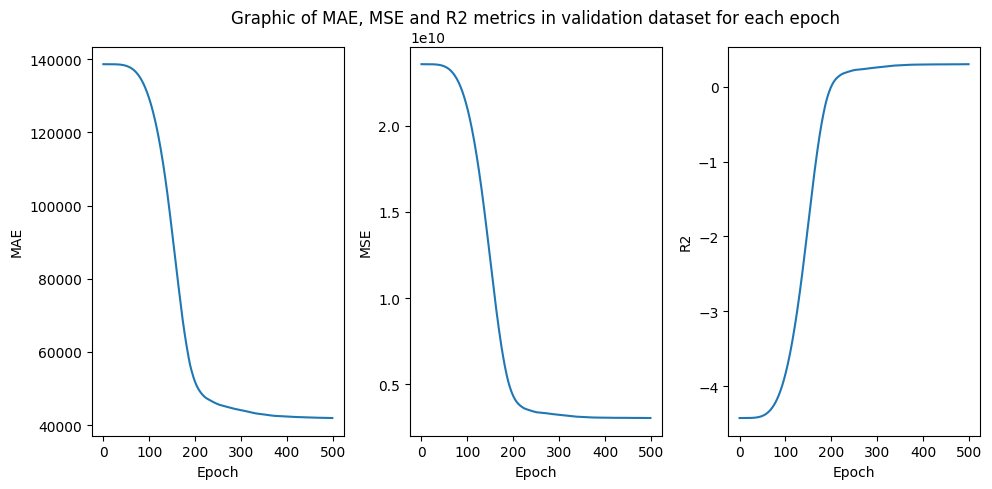

Evaluating model in test dataset...
Metrics results:
MAE = 44574.66015625 - MSE = 3381145600.0 - R2 = 0.22488938476179376
----------------------------------------------------------------------------------------------------
Adding feature #ano_trabalho
Metrics results:
MAE = 138639.203125 - MSE = 23566407680.0 - R2 = -4.423078808384952
Training metrics: epoch 1 - loss 129723.828125
Metrics results:
MAE = 138639.140625 - MSE = 23566385152.0 - R2 = -4.423073891490419
Training metrics: epoch 2 - loss 131566.640625
Metrics results:
MAE = 138639.046875 - MSE = 23566364672.0 - R2 = -4.4230690353075595
Training metrics: epoch 3 - loss 136548.578125
Metrics results:
MAE = 138638.96875 - MSE = 23566340096.0 - R2 = -4.423062886583818
Training metrics: epoch 4 - loss 130393.3671875
Metrics results:
MAE = 138638.859375 - MSE = 23566311424.0 - R2 = -4.42305597508665
Training metrics: epoch 5 - loss 133086.453125
Metrics results:
MAE = 138638.75 - MSE = 23566274560.0 - R2 = -4.423048043614122
Trainin

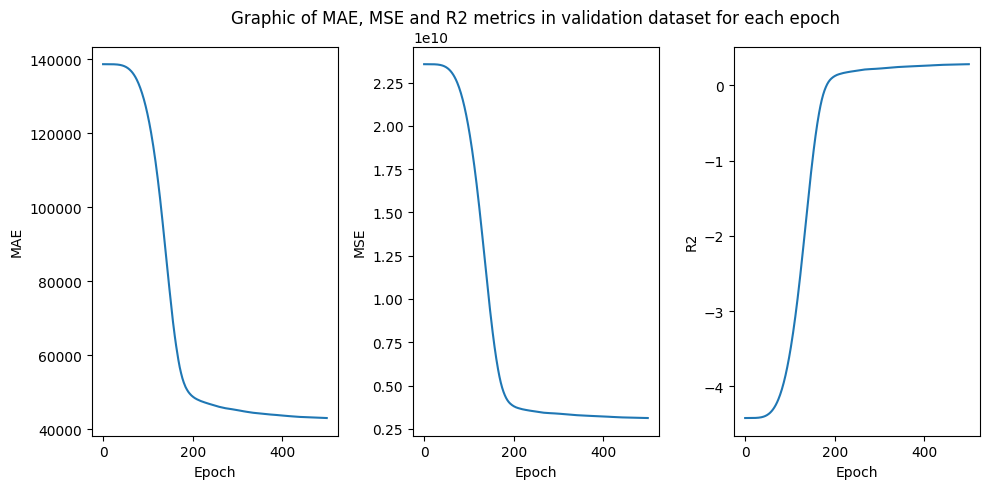

Evaluating model in test dataset...
Metrics results:
MAE = 44069.21484375 - MSE = 3324113152.0 - R2 = 0.237963688329214
----------------------------------------------------------------------------------------------------
Adding feature tipo_emprego
Metrics results:
MAE = 138639.015625 - MSE = 23566350336.0 - R2 = -4.423065013341712
Training metrics: epoch 1 - loss 131456.109375
Metrics results:
MAE = 138638.921875 - MSE = 23566325760.0 - R2 = -4.423059972103412
Training metrics: epoch 2 - loss 131521.8125
Metrics results:
MAE = 138638.828125 - MSE = 23566305280.0 - R2 = -4.423054481331789
Training metrics: epoch 3 - loss 132538.0625
Metrics results:
MAE = 138638.75 - MSE = 23566278656.0 - R2 = -4.423048141653192
Training metrics: epoch 4 - loss 134096.90625
Metrics results:
MAE = 138638.625 - MSE = 23566245888.0 - R2 = -4.423040791699796
Training metrics: epoch 5 - loss 130063.0390625
Metrics results:
MAE = 138638.46875 - MSE = 23566204928.0 - R2 = -4.423031955081297
Training metrics: 

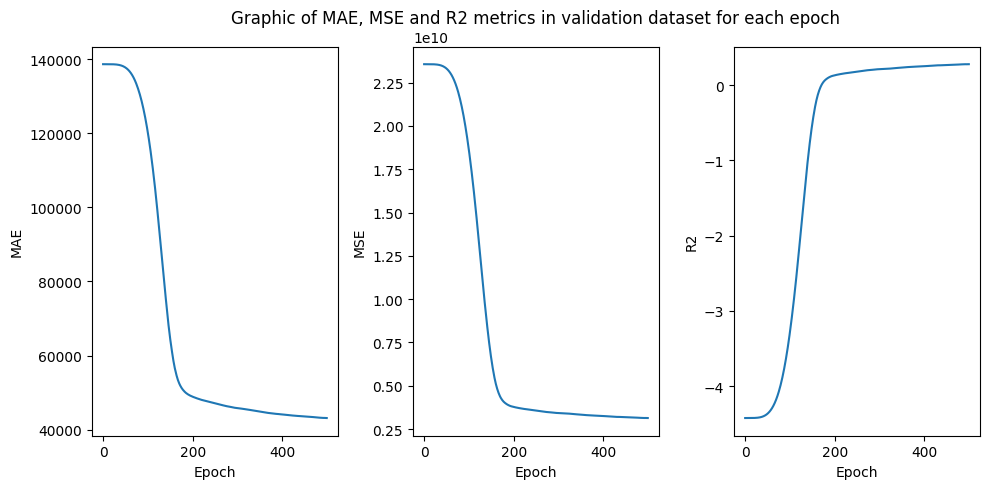

Evaluating model in test dataset...
Metrics results:
MAE = 44158.4140625 - MSE = 3314838016.0 - R2 = 0.24009015713472948
----------------------------------------------------------------------------------------------------
Adding feature percentual_remoto
Metrics results:
MAE = 138638.828125 - MSE = 23566307328.0 - R2 = -4.423055060166897
Training metrics: epoch 1 - loss 137641.3125
Metrics results:
MAE = 138638.734375 - MSE = 23566274560.0 - R2 = -4.423047922236798
Training metrics: epoch 2 - loss 131411.75
Metrics results:
MAE = 138638.625 - MSE = 23566239744.0 - R2 = -4.4230404958650595
Training metrics: epoch 3 - loss 130109.015625
Metrics results:
MAE = 138638.46875 - MSE = 23566202880.0 - R2 = -4.423032195149826
Training metrics: epoch 4 - loss 131070.0546875
Metrics results:
MAE = 138638.3125 - MSE = 23566163968.0 - R2 = -4.423022233941766
Training metrics: epoch 5 - loss 134346.578125
Metrics results:
MAE = 138638.125 - MSE = 23566110720.0 - R2 = -4.423010344593629
Training metr

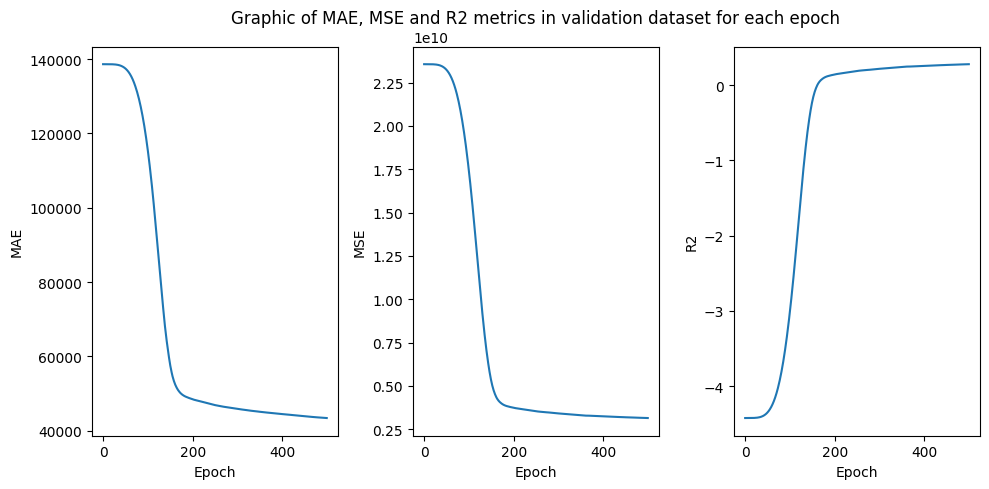

Evaluating model in test dataset...
Metrics results:
MAE = 44570.85546875 - MSE = 3324263680.0 - R2 = 0.23792933959618223
----------------------------------------------------------------------------------------------------
Adding feature tamanho_empresa
Metrics results:
MAE = 138639.1875 - MSE = 23566401536.0 - R2 = -4.423077119217203
Training metrics: epoch 1 - loss 135310.15625
Metrics results:
MAE = 138639.109375 - MSE = 23566381056.0 - R2 = -4.4230727977598185
Training metrics: epoch 2 - loss 132577.421875
Metrics results:
MAE = 138639.046875 - MSE = 23566364672.0 - R2 = -4.423068296654791
Training metrics: epoch 3 - loss 130655.9609375
Metrics results:
MAE = 138638.96875 - MSE = 23566338048.0 - R2 = -4.423062726437715
Training metrics: epoch 4 - loss 134947.28125
Metrics results:
MAE = 138638.859375 - MSE = 23566309376.0 - R2 = -4.423055846324599
Training metrics: epoch 5 - loss 134500.53125
Metrics results:
MAE = 138638.734375 - MSE = 23566274560.0 - R2 = -4.423047394563425
Train

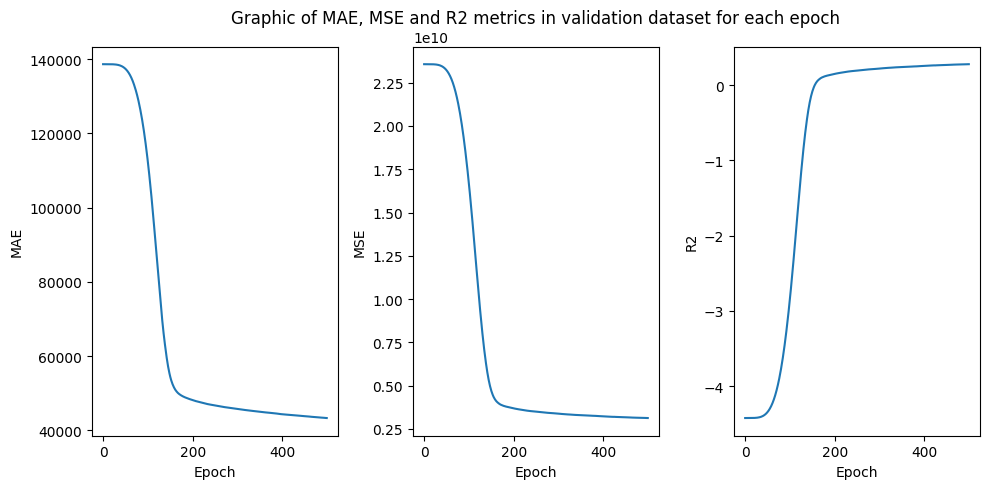

Evaluating model in test dataset...
Metrics results:
MAE = 44373.4140625 - MSE = 3294615040.0 - R2 = 0.24472603957678163
----------------------------------------------------------------------------------------------------
Adding feature residencia_empregado
Metrics results:
MAE = 138639.15625 - MSE = 23566395392.0 - R2 = -4.423075333481052
Training metrics: epoch 1 - loss 130749.953125
Metrics results:
MAE = 138639.09375 - MSE = 23566372864.0 - R2 = -4.423071439448829
Training metrics: epoch 2 - loss 131120.109375
Metrics results:
MAE = 138639.03125 - MSE = 23566356480.0 - R2 = -4.423066925754199
Training metrics: epoch 3 - loss 133275.9375
Metrics results:
MAE = 138638.953125 - MSE = 23566336000.0 - R2 = -4.423061705920527
Training metrics: epoch 4 - loss 132677.203125
Metrics results:
MAE = 138638.84375 - MSE = 23566305280.0 - R2 = -4.423054973876448
Training metrics: epoch 5 - loss 133953.640625
Metrics results:
MAE = 138638.703125 - MSE = 23566270464.0 - R2 = -4.42304688560082
Trai

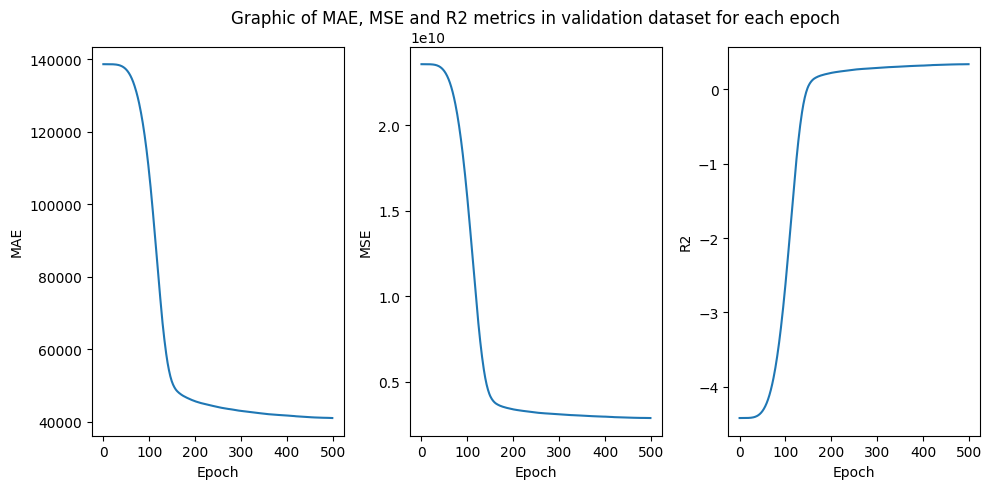

Evaluating model in test dataset...
Metrics results:
MAE = 42393.30859375 - MSE = 3100219648.0 - R2 = 0.2892902263609691
----------------------------------------------------------------------------------------------------
Adding feature local_empresa
Metrics results:
MAE = 138638.703125 - MSE = 23566274560.0 - R2 = -4.423047570165157
Training metrics: epoch 1 - loss 135672.65625
Metrics results:
MAE = 138638.671875 - MSE = 23566249984.0 - R2 = -4.423042507781011
Training metrics: epoch 2 - loss 137328.15625
Metrics results:
MAE = 138638.546875 - MSE = 23566227456.0 - R2 = -4.423037210142006
Training metrics: epoch 3 - loss 136370.828125
Metrics results:
MAE = 138638.4375 - MSE = 23566196736.0 - R2 = -4.423030309755404
Training metrics: epoch 4 - loss 134270.03125
Metrics results:
MAE = 138638.3125 - MSE = 23566159872.0 - R2 = -4.423021995074039
Training metrics: epoch 5 - loss 130389.15625
Metrics results:
MAE = 138638.15625 - MSE = 23566110720.0 - R2 = -4.423010792815273
Training metr

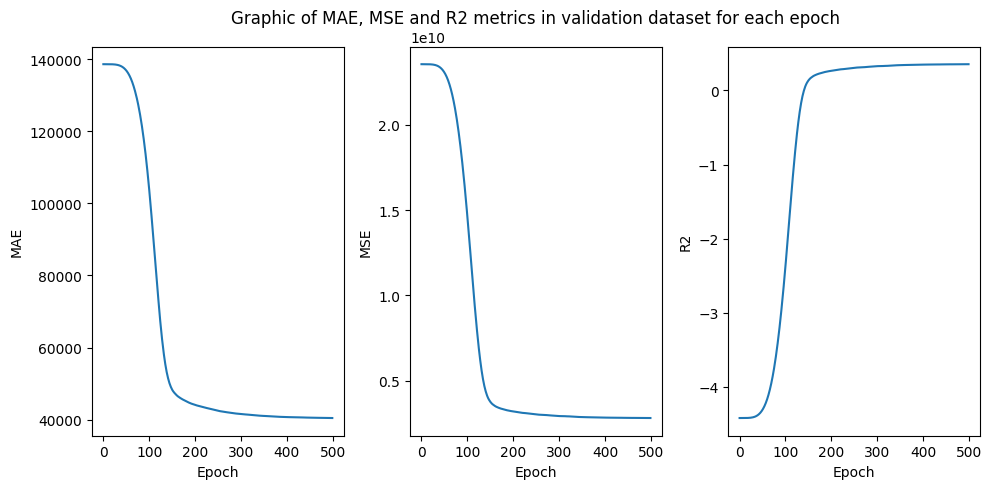

Evaluating model in test dataset...
Metrics results:
MAE = 42440.96484375 - MSE = 3098748416.0 - R2 = 0.2896274596184698
----------------------------------------------------------------------------------------------------
Adding feature nivel_experiencia
Metrics results:
MAE = 138639.09375 - MSE = 23566379008.0 - R2 = -4.4230719737056985
Training metrics: epoch 1 - loss 135932.953125
Metrics results:
MAE = 138639.046875 - MSE = 23566358528.0 - R2 = -4.423067213455274
Training metrics: epoch 2 - loss 132458.609375
Metrics results:
MAE = 138638.9375 - MSE = 23566331904.0 - R2 = -4.423061325339232
Training metrics: epoch 3 - loss 133942.703125
Metrics results:
MAE = 138638.828125 - MSE = 23566305280.0 - R2 = -4.42305442650907
Training metrics: epoch 4 - loss 138491.21875
Metrics results:
MAE = 138638.703125 - MSE = 23566264320.0 - R2 = -4.423045722474691
Training metrics: epoch 5 - loss 131836.703125
Metrics results:
MAE = 138638.53125 - MSE = 23566217216.0 - R2 = -4.423034777108247
Train

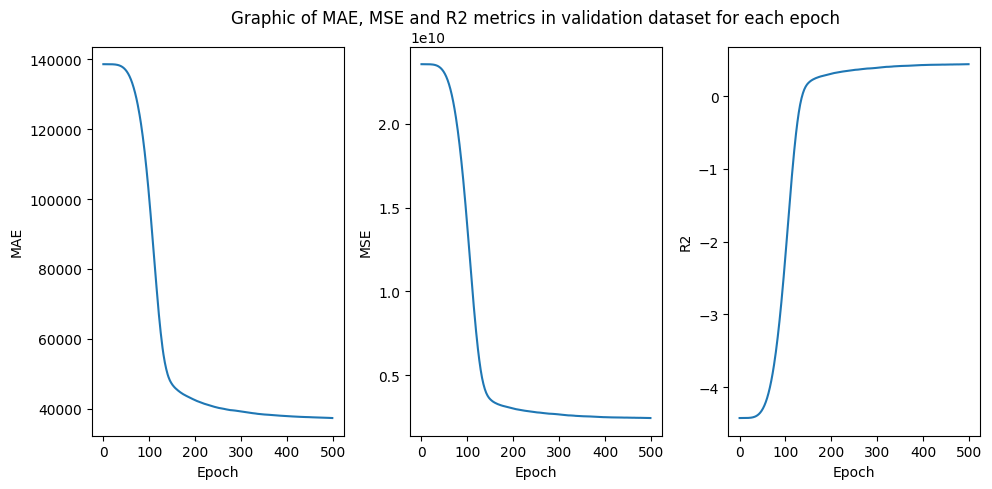

Evaluating model in test dataset...
Metrics results:
MAE = 39436.875 - MSE = 2748995072.0 - R2 = 0.36980673280371235
----------------------------------------------------------------------------------------------------
Adding feature titulo_trabalho
Metrics results:
MAE = 138638.6875 - MSE = 23566266368.0 - R2 = -4.423046003205251
Training metrics: epoch 1 - loss 136418.484375
Metrics results:
MAE = 138638.625 - MSE = 23566241792.0 - R2 = -4.4230405559324
Training metrics: epoch 2 - loss 132058.703125
Metrics results:
MAE = 138638.515625 - MSE = 23566217216.0 - R2 = -4.423034168629625
Training metrics: epoch 3 - loss 136266.046875
Metrics results:
MAE = 138638.40625 - MSE = 23566180352.0 - R2 = -4.423026308477257
Training metrics: epoch 4 - loss 138999.328125
Metrics results:
MAE = 138638.234375 - MSE = 23566135296.0 - R2 = -4.423016234922999
Training metrics: epoch 5 - loss 130247.6171875
Metrics results:
MAE = 138638.03125 - MSE = 23566077952.0 - R2 = -4.423002868315351
Training metri

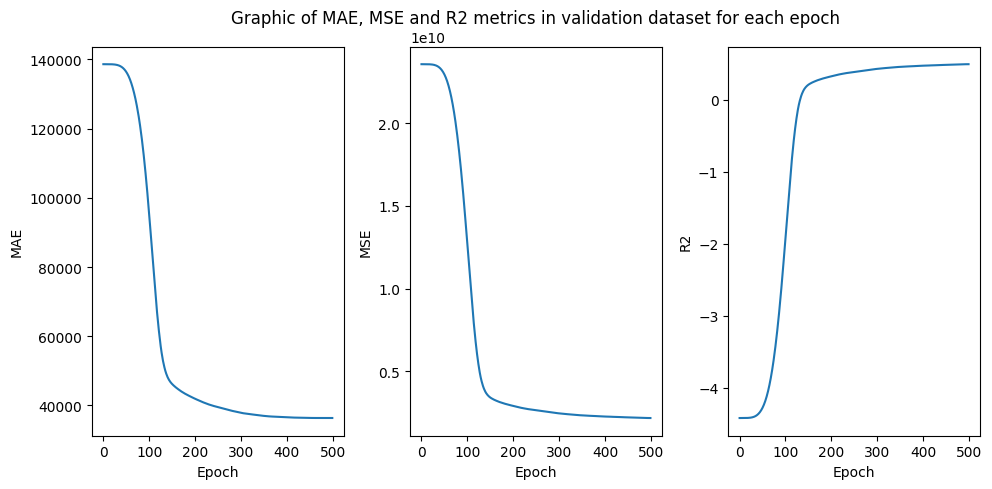

Evaluating model in test dataset...
Metrics results:
MAE = 36744.484375 - MSE = 2487861504.0 - R2 = 0.429670246055618
----------------------------------------------------------------------------------------------------


In [54]:
current_features = []
def calc_qtd_one_hot_encoding(df):
    total_features = 0
    for column in df.columns:
        unique_values = df[column].unique().tolist()
        total_features += len(unique_values)
    return total_features

for feature in features:
    current_features.append(feature)
    print("Adding feature",feature)
    model = pytorch_train_eval_pipeline(epochs,ModelV1,
                                    loss_fn,
                                    512,
                                    df,
                                    current_features,
                                    label,
                                    transform_data_functions = [one_hot_encoding],
                                    hyperparameters = [calc_qtd_one_hot_encoding(df[current_features]),20,30,15,1],
                                    transform_functions = [transform] )
    print('-'*100)

Ao final deste notebook é apresentada uma discussão acerca destes resultados.

### Retirando outliers

Como visto durante o treinamento do modelo com SVM, o dataset contém vários outliers, o que pode estar dificultando o aprendizado do modelo. Assim outliers serão removidos e os melhores modelos serão treinados novamente.

#### Função para remover outliers
A função abaixo remove observações que contém salários que são outliers a partir da fórmula que os boxplots utilizam para identificar outliers.

In [55]:
def remove_outliers(df):
    Q1 = df['salario_em_dolar'].quantile(0.25)
    Q3 = df['salario_em_dolar'].quantile(0.75)
    IQR = Q3 - Q1
    df_out = df[~((df['salario_em_dolar'] < (Q1 - 1.5 * IQR)) |(df['salario_em_dolar'] > (Q3 + 1.5 * IQR)))]
    return df_out
df_cp5 = remove_outliers(df)

In [56]:
df_cp5

,#ano_trabalho,nivel_experiencia,tipo_emprego,titulo_trabalho,moeda_salario,salario_em_dolar,residencia_empregado,percentual_remoto,local_empresa,tamanho_empresa
0,2023,SE,FT,Principal Data Scientist,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...
3749,2021,SE,FT,Data Specialist,USD,165000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,USD,100000,US,100,US,L


#### Treinando melhor modelo PyTorch nos dados sem outliers

Metrics results:
MAE = 130825.5625 - MSE = 21324908544.0 - R2 = -4.065747130095022
Training metrics: epoch 1 - loss 134270.203125
Metrics results:
MAE = 130817.2265625 - MSE = 21322653696.0 - R2 = -4.065210906623544
Training metrics: epoch 2 - loss 127506.765625
Metrics results:
MAE = 130803.375 - MSE = 21318891520.0 - R2 = -4.064317572977262
Training metrics: epoch 3 - loss 128391.484375
Metrics results:
MAE = 130781.703125 - MSE = 21313019904.0 - R2 = -4.062922500440646
Training metrics: epoch 4 - loss 126635.828125
Metrics results:
MAE = 130749.59375 - MSE = 21304313856.0 - R2 = -4.060854699746061
Training metrics: epoch 5 - loss 128541.671875
Metrics results:
MAE = 130703.6875 - MSE = 21291878400.0 - R2 = -4.057900255473608
Training metrics: epoch 6 - loss 132704.75
Metrics results:
MAE = 130640.0 - MSE = 21274636288.0 - R2 = -4.053804402523185
Training metrics: epoch 7 - loss 134185.0625
Metrics results:
MAE = 130553.890625 - MSE = 21251342336.0 - R2 = -4.048271575359407
Training 

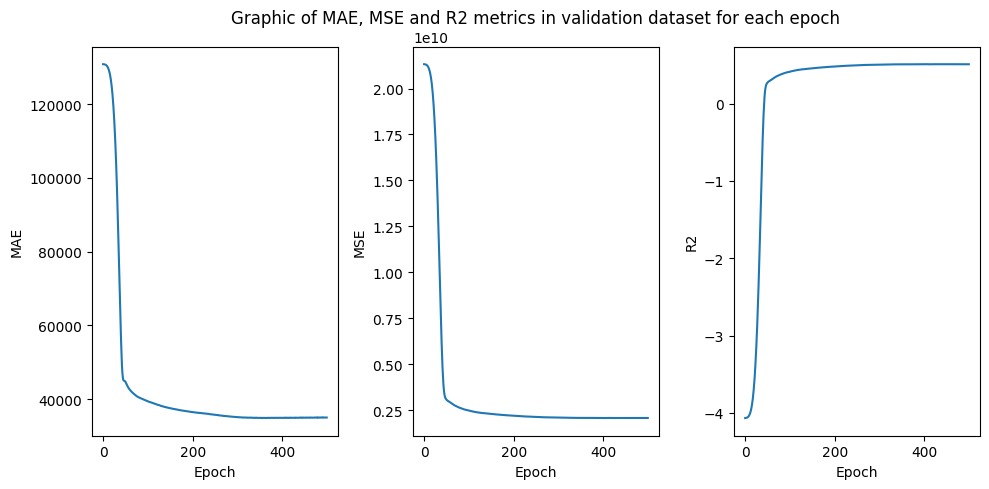

Evaluating model in test dataset...
Metrics results:
MAE = 34565.62890625 - MSE = 1947796096.0 - R2 = 0.5120317773835166


In [57]:
df_cp5['derivate_att'] = df_cp5['titulo_trabalho'].map(lambda x: x.split()[-1])
features5 = list(set(df_cp5.columns)-set(label))
model = pytorch_train_eval_pipeline(500,ModelV2,loss_fn,512,df_cp5,features5,label,
                                    transform_data_functions = [transform_categoric_values_to_token_values],
                                    hyperparameters = [225,dim_embed_vocab,first_dim_mlp,128,64,1],
                                    transform_functions = [transform_int,transform] )


#### Treinamento do SVM com os dados sem outliers

In [58]:
df_cp5['derivate_att'] = df_cp5['titulo_trabalho'].map(lambda x: x.split()[-1])
df_cp5,features5 = one_hot_encoding(df_cp5,features5)
param_grid = {
        'C': [100000,150000,200000],
        'epsilon': [0.1, 0.01, 0.001],
        'kernel': ['poly','rbf','linear','sigmoid']
    }
train_eval_sklearn_model_with_cv_and_grid_search(svm.SVR(),param_grid,df_cp5,features5,label)

MAE = 36413.435843274485 - MSE = 2171524738.0898747 - R2 = 0.5035461699623953
Melhores parâmetros encontrados: {'C': 100000, 'epsilon': 0.1, 'kernel': 'rbf'}
Melhor pontuação (R² Score): 0.5524427909024806


Ao remover os outliers os resultados foram melhorados, mas ainda assim os resultados não foram bons. Possivelmente este conjunto de dados não é suficiente para que um modelo aprenda a prever a variável salario_em_dolar, sendo necessário mais dados.

### Ajuste de hiper-parâmetros
Os hiper-parâmetros do modelo versão dois treinado nos dados sem outliers e com adição do atributo derivado serão ajustados, uma vez que este obteve os melhores resultados. Todos os ajustes consistem em variar a quantidade de neurônios de cada camada da MLP.

#### Ajuste 1

Metrics results:
MAE = 130800.3828125 - MSE = 21318117376.0 - R2 = -4.064133986940909
Training metrics: epoch 1 - loss 131261.0625
Metrics results:
MAE = 130632.3203125 - MSE = 21272760320.0 - R2 = -4.053358701310945
Training metrics: epoch 2 - loss 134024.265625
Metrics results:
MAE = 130114.0546875 - MSE = 21133316096.0 - R2 = -4.020233907446675
Training metrics: epoch 3 - loss 133652.734375
Metrics results:
MAE = 128893.3359375 - MSE = 20807049216.0 - R2 = -3.942729561746713
Training metrics: epoch 4 - loss 125307.96875
Metrics results:
MAE = 126419.796875 - MSE = 20155256832.0 - R2 = -3.7878951518241086
Training metrics: epoch 5 - loss 131525.84375
Metrics results:
MAE = 121878.875 - MSE = 18989692928.0 - R2 = -3.511015067571855
Training metrics: epoch 6 - loss 125492.6640625
Metrics results:
MAE = 114195.109375 - MSE = 17088581632.0 - R2 = -3.059404278166342
Training metrics: epoch 7 - loss 114127.28125
Metrics results:
MAE = 101985.5078125 - MSE = 14260683776.0 - R2 = -2.38763540

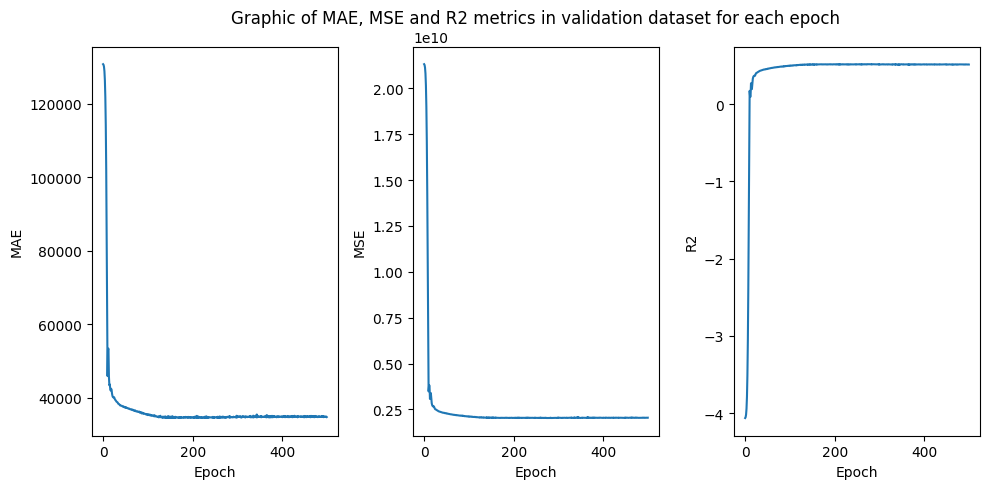

Evaluating model in test dataset...
Metrics results:
MAE = 34925.29296875 - MSE = 1964992384.0 - R2 = 0.5077236984224304


In [62]:
df_cp5 = remove_outliers(df)
df_cp5['derivate_att'] = df_cp5['titulo_trabalho'].map(lambda x: x.split()[-1])
features5 = list(set(df_cp5.columns)-set(label))
model = pytorch_train_eval_pipeline(500,ModelV2,loss_fn,512,df_cp5,features5,label,
                                    transform_data_functions = [transform_categoric_values_to_token_values],
                                    hyperparameters = [225,dim_embed_vocab,first_dim_mlp,1024,512,64,1],
                                    transform_functions = [transform_int,transform] )


#### Ajuste 2

Metrics results:
MAE = 130824.3515625 - MSE = 21324595200.0 - R2 = -4.065672338055135
Training metrics: epoch 1 - loss 130901.359375
Metrics results:
MAE = 130807.2109375 - MSE = 21319979008.0 - R2 = -4.06457604247783
Training metrics: epoch 2 - loss 129129.5546875
Metrics results:
MAE = 130768.4375 - MSE = 21309536256.0 - R2 = -4.062095522698462
Training metrics: epoch 3 - loss 130376.1171875
Metrics results:
MAE = 130693.25 - MSE = 21289304064.0 - R2 = -4.057289448671236
Training metrics: epoch 4 - loss 131059.2890625
Metrics results:
MAE = 130559.9296875 - MSE = 21253466112.0 - R2 = -4.048776167878727
Training metrics: epoch 5 - loss 126376.46875
Metrics results:
MAE = 130337.9296875 - MSE = 21193885696.0 - R2 = -4.03462181466373
Training metrics: epoch 6 - loss 130985.296875
Metrics results:
MAE = 129985.171875 - MSE = 21099436032.0 - R2 = -4.012186285884514
Training metrics: epoch 7 - loss 131791.734375
Metrics results:
MAE = 129445.375 - MSE = 20955418624.0 - R2 = -3.977974181333

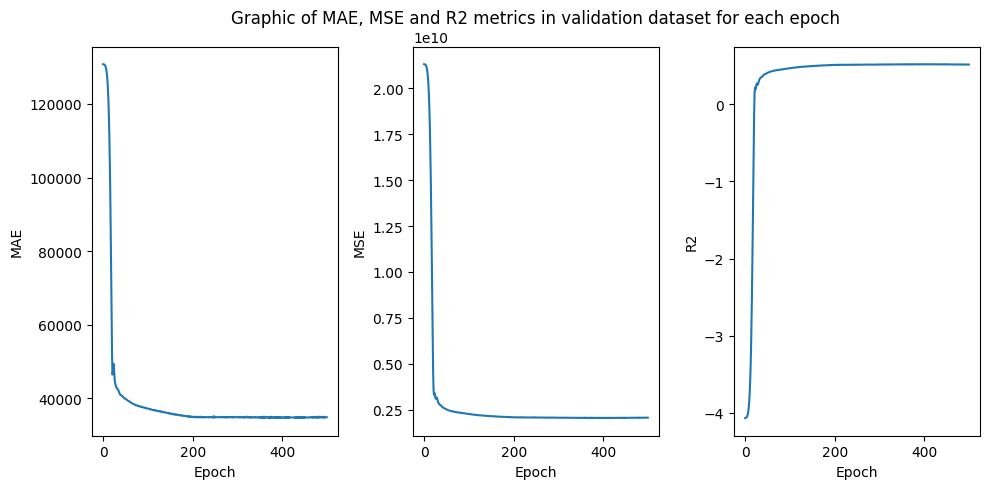

Evaluating model in test dataset...
Metrics results:
MAE = 34722.515625 - MSE = 1954696704.0 - R2 = 0.5103030217800111


In [63]:
model = pytorch_train_eval_pipeline(500,ModelV2,loss_fn,512,df_cp5,features5,label,
                                    transform_data_functions = [transform_categoric_values_to_token_values],
                                    hyperparameters = [225,dim_embed_vocab,first_dim_mlp,512,64,32,1],
                                    transform_functions = [transform_int,transform] )


O ajuste de hiper parametros não gerou um resultado melhor. Não é necessário aplicar mais ajustes, pois os modelos estão variando similarmente nos mesmos valores das métricas com diferentes hiper-parametros, indicando que a sua alteração não contribuirá com os resultados.

### Resultados e discussões
#### Resultados dos modelos
A tabela abaixo apresenta os resultados obtidos no dataset de teste para os seguintes modelos:
* **ModelV1**: MLP + LeakyReLU entre cada camada da MLP. A transformação dos dados ocorreu utilizando one-hot encoding;
* **ModelV2**: ModelV1 com acréscimo da rede neural Embedding. A transformação dos dados ocorreu a partir da transformação de cada valor categórico do dataset para um valor numérico distinto, represetando os tokens que serão passado na rede de Embedding;
* **SVM e LinearRegression**: Modelos do *sklearn* treinados a partir de grid search e validação cruzada de 10 folds.


As abreviações em alguns modelos precedidas do símbolo + indicam:
* **attr**: Atributo derivado do atributo título trabalho. Mais detalhes podem ser vistos no resumo da análise exploratória ou nas células de derivações deste atributo;
* **AH**: Melhor modelo obtido com variação de diferentes hiper-parâmetros;
* **w/o *outliers***: Remoção de *outliers* do dataset.


| Modelos | MAE | MSE | R2 |
|-------|----------|----------|--------|
| ModelV1     | 36633.69 | 2479546880.0 | 43.1% |
| LinearRegression + AH  | 512568079314962.0 | 1.4716064423095302e+31 | -3.364385594037576e+21 |
| SVM + AH | 37643.80 | 2595270634.87 | 40.6% |
| SVM + AH + attr | 37420.23 |2578409485.63 | 41% |
| SVM + AH + attr + w/o *outliers* | 36413.43 | 2171524738.08 | 50.3% |
| ModelV2     | 36160.09 | 2455460864.0 | 43.7% |
| ModelV2 + attr     | 35964.73 | 2450199552.0 | 43.8%|
| ModelV2 + attr + w/o *outliers* | **34565.62** | **1947796096.0**| **51.2%** |
| ModelV2 + attr + AH + w/o *outliers* | 34722.51 | 1954696704.0 | 51% |

O melhor modelo obtido foi o penúltimo modelo da tabela. Durante o treinamento e análise exploratória foi identificada a possibilidade de se derivar um atributo e a presença de ouliers do dataset, permitindo melhorias relevantes nos modelos, apesar de ainda não serem bons resultados. Vale ressaltar que o modelo Linear Regression possivelmente retornou estes valores devido ao dataset não possuir um comportameneto linear, visto também no melhor resultado utilizando o SVM, o qual foi obtido a partir do kernel RBF e não linear. 

Mesmo redes poderosas como redes de Embedding e MLP não conseguiram avançar os resultados em diferentes métricas. Como o SVM também conseguiu um resultado similar, possivelmente estes dados não são suficientes para treinar um modelo para prever o atributo salario_em_dolar. Vale ressaltar que foi feito também o treinamento das redes neurais com validação cruzada, no entanto, os resultados em cada validação foi bem similar, reforçando a necessidade de melhores ou novos dados no dataset.  

Por fim, percebe-se através do MAE obtido pelos modelos que eles possuem um erro absoluto médio entre 34k e 38k. Este é um erro relevante pois a maioria das pessoas ganham um salário entre 0 e 200.000, ou seja, estes modelos não devem ser utilizados em produção para este problema.
#### Resultados da análise da importância dos atributos
Durante o treinamento foi analisado o comportamento do modelo versão 1 conforme os atributos do dataset foram acrescentados iterativamente, para que fosse possível identificar atributos relevantes. O acréscimo de cada atributo permitiu uma melhoria nos resultados, alguns mais do que outros. A partir da análise realizada, os atributos titulo_trabalho, moeda_salario e nivel_experiencia são considerados os atributos mais importantes para prever o salario_em_dolar, uma vez que geraram melhorias significativas nos resultados com o seu acréscimo. Para validar esta hipótese, o código abaixo apresenta o resultado obtido pelo melhor modelo ao considerar apenas estas 3 features.

Metrics results:
MAE = 138637.15625 - MSE = 23565824000.0 - R2 = -4.4229440472201675
Training metrics: epoch 1 - loss 133260.171875
Metrics results:
MAE = 138633.34375 - MSE = 23564722176.0 - R2 = -4.422690631678137
Training metrics: epoch 2 - loss 134846.09375
Metrics results:
MAE = 138626.765625 - MSE = 23562827776.0 - R2 = -4.422254979802391
Training metrics: epoch 3 - loss 133437.59375
Metrics results:
MAE = 138616.484375 - MSE = 23559868416.0 - R2 = -4.421573765729644
Training metrics: epoch 4 - loss 133695.8125
Metrics results:
MAE = 138601.3125 - MSE = 23555497984.0 - R2 = -4.4205679187047
Training metrics: epoch 5 - loss 127671.328125
Metrics results:
MAE = 138579.765625 - MSE = 23549296640.0 - R2 = -4.419141486474499
Training metrics: epoch 6 - loss 134538.890625
Metrics results:
MAE = 138550.203125 - MSE = 23540783104.0 - R2 = -4.417182634335195
Training metrics: epoch 7 - loss 129971.4296875
Metrics results:
MAE = 138510.546875 - MSE = 23529390080.0 - R2 = -4.41456025467776


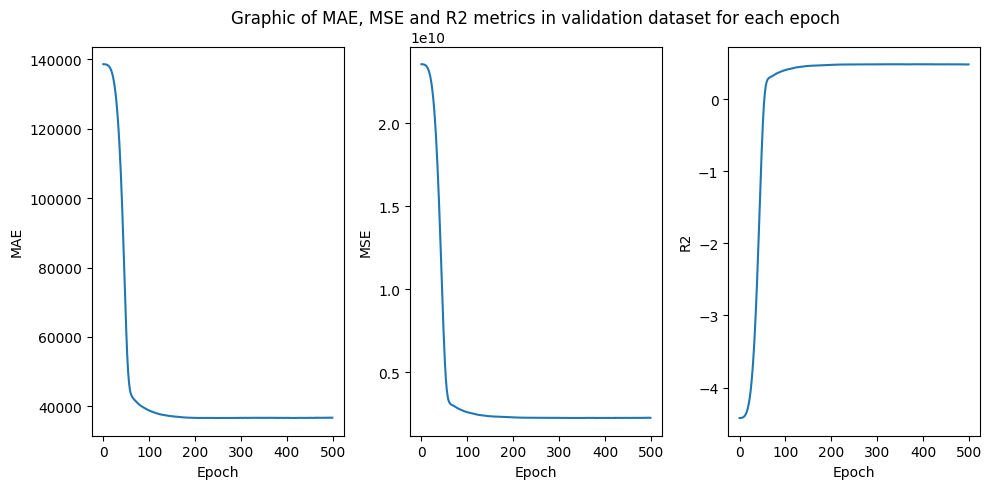

Evaluating model in test dataset...
Metrics results:
MAE = 37713.54296875 - MSE = 2643467264.0 - R2 = 0.39399844262988126


In [65]:
dim_embed_vocab = 256
first_dim_mlp = dim_embed_vocab*3
df_cp6 = df[['titulo_trabalho','salario_em_dolar','moeda_salario','nivel_experiencia']]
features6 = ['titulo_trabalho','moeda_salario','nivel_experiencia']
model = pytorch_train_eval_pipeline(500,ModelV2,loss_fn,512,df_cp6,features6,label,
                                    transform_data_functions = [transform_categoric_values_to_token_values],
                                    hyperparameters = [225,dim_embed_vocab,first_dim_mlp,128,64,1],
                                    transform_functions = [transform_int,transform] )


Como esperado, apenas estes atributos são capazes de atingir um R2 de 39% no dataset de teste, ou seja, os outros 7 atributos geram uma melhoria de "apenas" 12% nesta métrica. 